In [61]:
%reload_ext autoreload
%autoreload 2

In [92]:
import function as func
from ellipsoid_mirror import *
np.set_printoptions(threshold=20)

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# General setting

In [63]:
freq = 20*GHz 
wavelength = calc_wavelength(freq)

# Setup calculation

## Horn antenna

In [64]:
antenna_a = 4*mm # waveguide long edge
antenna_b = 10*mm # waveguide short edge (E-field direction)
antenna_L = 60*mm # antenna length
antenna_taper = np.deg2rad(7) # antenna taper angle

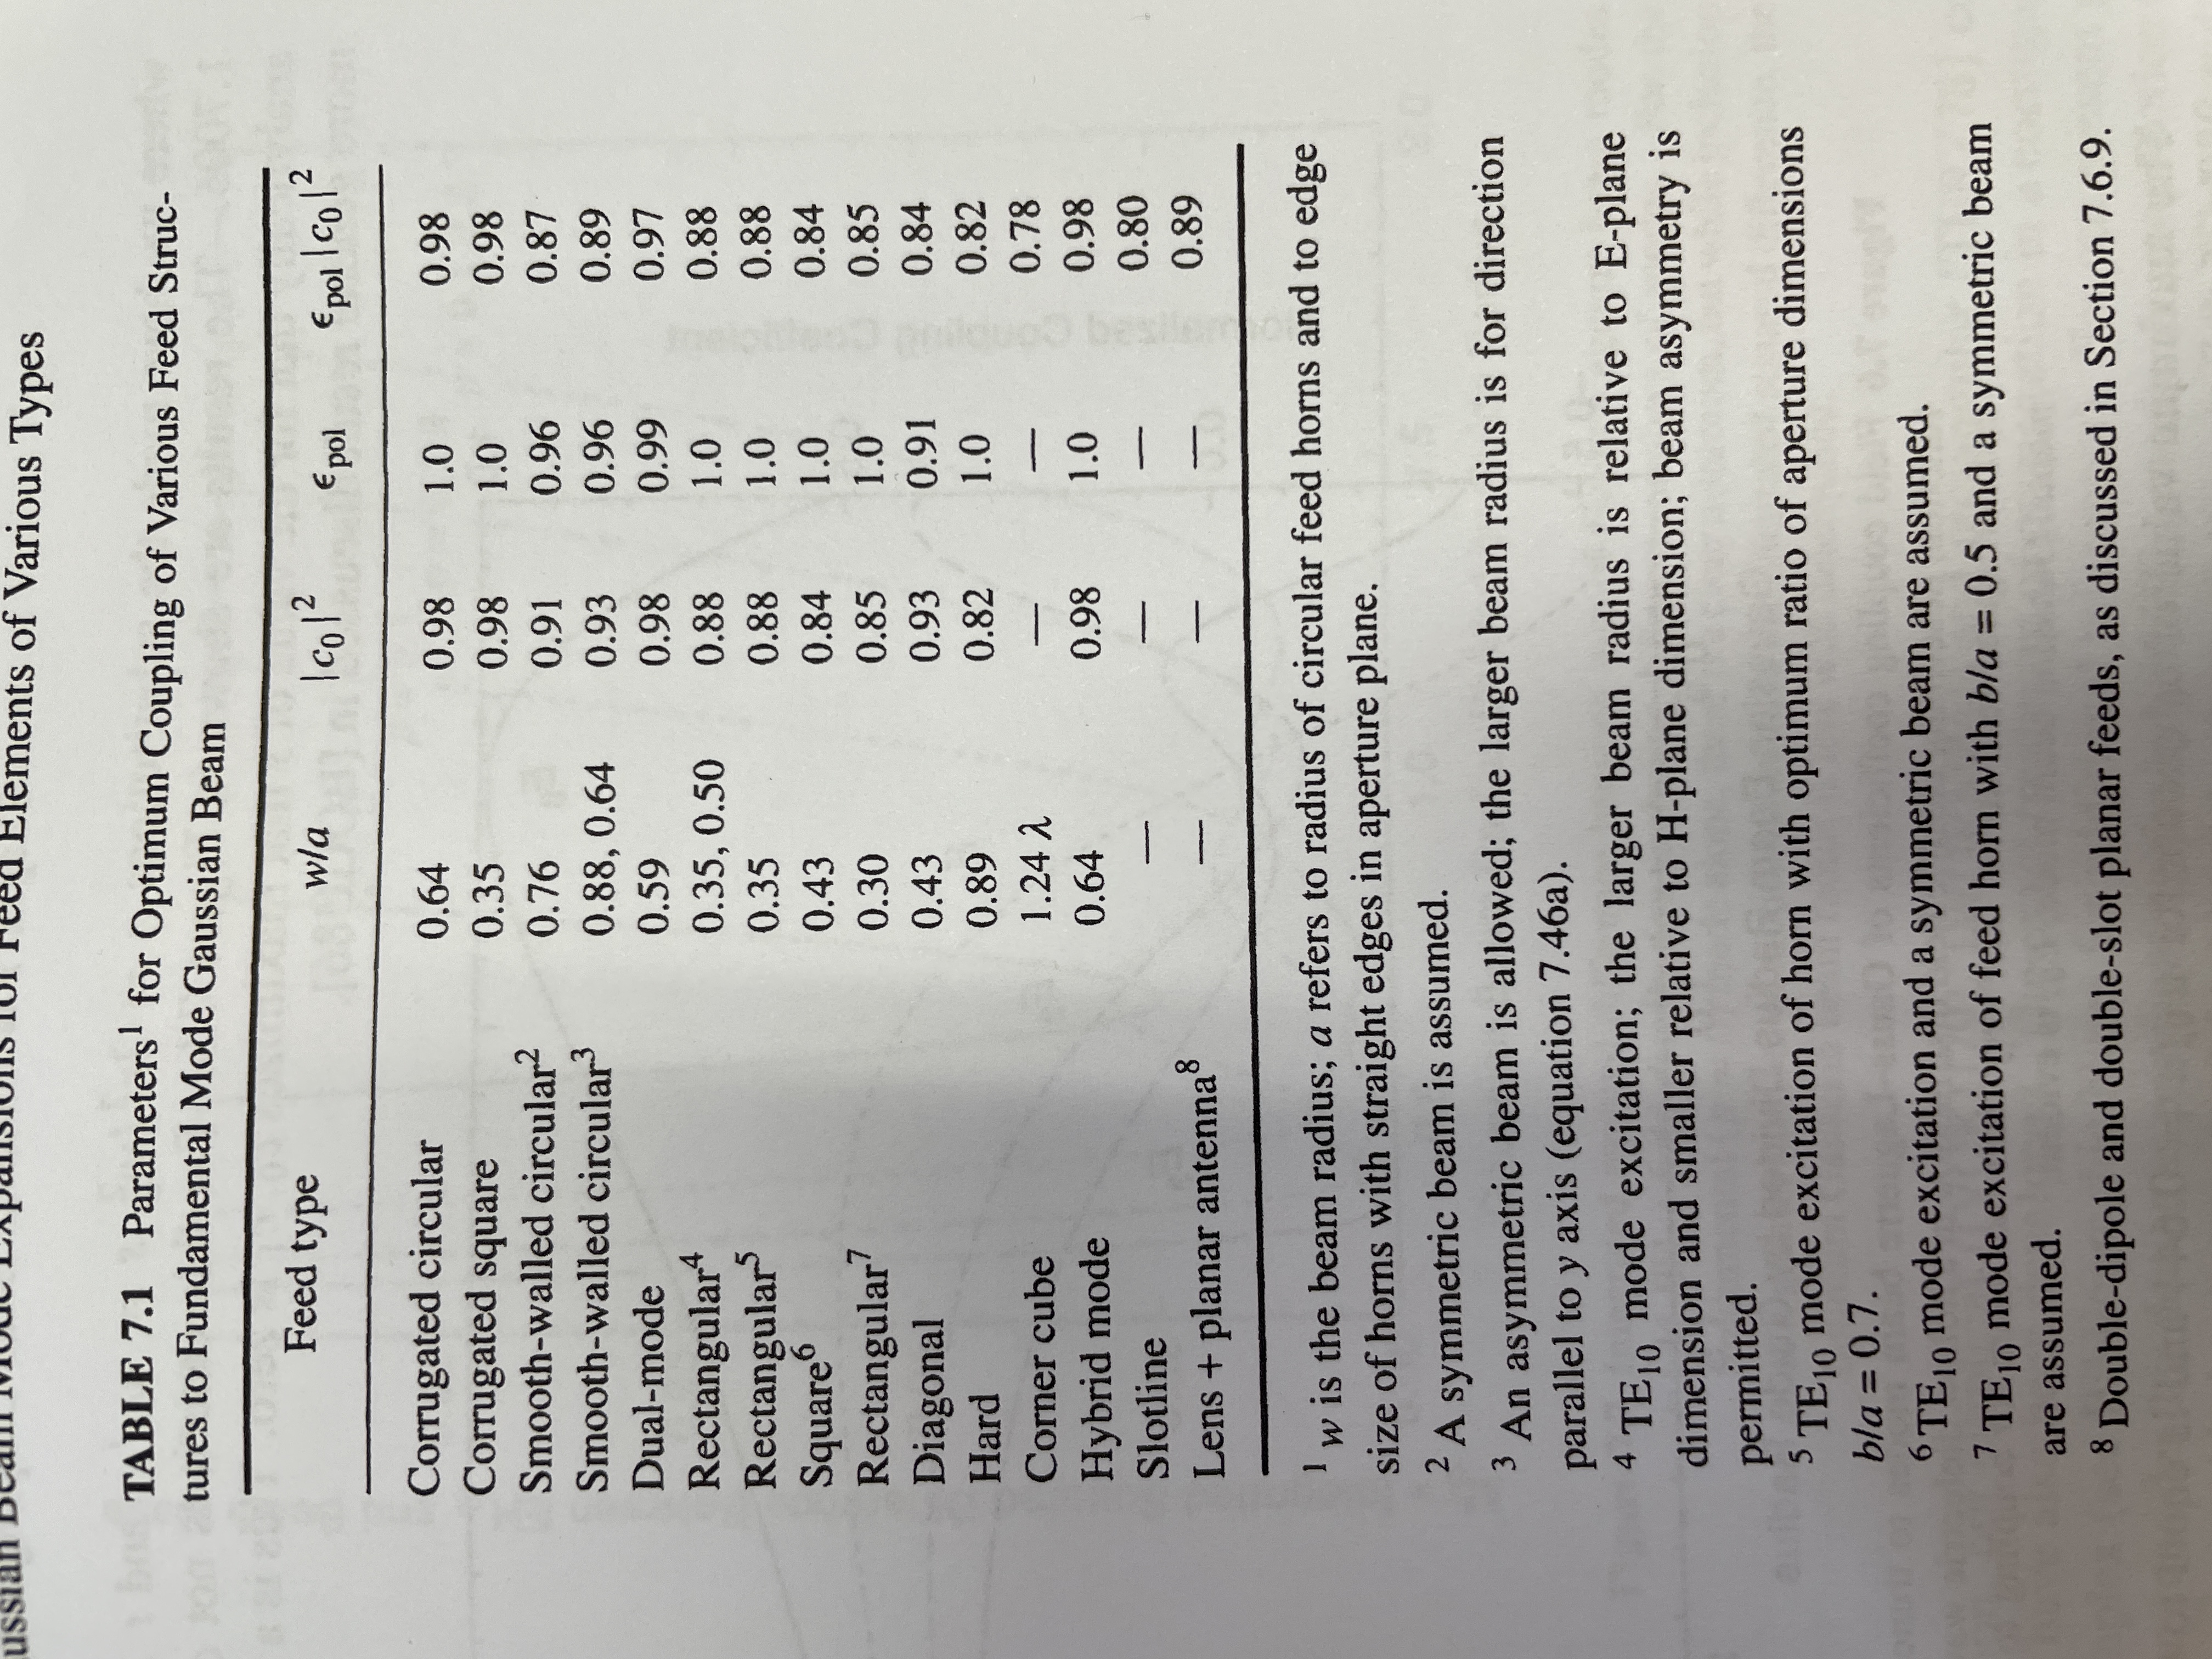

In [65]:
from IPython.display import Image
Image('Goldsmith_table7.1.JPG', width=400)

In [66]:
def calc_antenna_parameters(
    antenna_a=antenna_a, antenna_b=antenna_b, 
    antenna_L=antenna_L, antenna_taper=antenna_taper,
    
    antenna_w_over_A = 0.50, 
    antenna_w_over_B = 0.35,
    # from P. F. Goldsmith table 7.1 
    # rectangular^5: H-plane = 0.35
    #                           E-plane = 0.50
    
    verbose = 1,
    ):
    
    if antenna_w_over_B is None:
        antenna_w_over_B = antenna_w_over_A
        pass
    antenna_A = antenna_a + 2. * antenna_L * np.tan(antenna_taper)
    antenna_B = antenna_b + 2. * antenna_L * np.tan(antenna_taper)
    antenna_Ra = antenna_A/2. / np.sin(antenna_taper)
    antenna_Rb = antenna_B/2. / np.sin(antenna_taper)

    # Beam waist
    antenna_wA = antenna_w_over_A * antenna_A
    antenna_wB = antenna_w_over_B * antenna_B
    antenna_w0A = calc_beamwaist0(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_w0B = calc_beamwaist0(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_d0A = calc_waist_distance(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_d0B = calc_waist_distance(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_L0A = antenna_L - antenna_d0A
    antenna_L0B = antenna_L - antenna_d0B

    # Check
    if verbose > 0:
        print(f'a = {antenna_a/mm} mm')
        print(f'b = {antenna_b/mm} mm')
        print(f'A = {antenna_A/mm} mm')
        print(f'B = {antenna_B/mm} mm')
        print(f'Ra = {antenna_Ra/mm} mm')
        print(f'Rb = {antenna_Rb/mm} mm')
        print(f'A/B = {antenna_A/antenna_B}')
        print(f'w_A/A = {antenna_w_over_A}')
        print(f'w_B/B = {antenna_w_over_B}')
        print(f'beam waist in A = {antenna_w0A/mm} mm')
        print(f'beam waist distance from aperture in A = -{antenna_d0A/mm} mm')
        print(f'beam waist distance from antenna bottom in A = {antenna_L0A/mm} mm')
        print(f'beam waist in B = {antenna_w0B/mm} mm')
        print(f'beam waist distance from aperture in B = -{antenna_d0B/mm} mm')
        print(f'beam waist distance from antenna bottom in B = {antenna_L0B/mm} mm')
        print(f'antenna taper angle in A = {np.rad2deg( np.arcsin(antenna_A/2./antenna_Ra) )} deg')
        print(f'antenna taper angle in B = {np.rad2deg( np.arcsin(antenna_B/2./antenna_Rb) )} deg')
        pass
    
    antenna_pars = {
        'L': antenna_L,
        'taper':antenna_taper,
        'w_over_A': antenna_w_over_A, 
        'w_over_B': antenna_w_over_B, 
        
        'a': antenna_a, 
        'A': antenna_A, 
        'Ra': antenna_Ra, 
        'wA': antenna_wA, 
        'w0A': antenna_w0A, 
        'd0A': antenna_d0A, 
        'L0A': antenna_L0A, 
        
        'b': antenna_b, 
        'B': antenna_B, 
        'Rb': antenna_Rb, 
        'wB': antenna_wB, 
        'w0B': antenna_w0B, 
        'd0B': antenna_d0B, 
        'L0B': antenna_L0B, 
        }
    
    return antenna_pars


def calc_circular_antenna_parameters(
    antenna_R, 
    antenna_L=antenna_L, 
    antenna_taperA=antenna_taper,
    antenna_taperB=antenna_taper,
    antenna_w_over_A = 0.88, 
    antenna_w_over_B = 0.64,
    # from P. F. Goldsmith table 7.1 
    # smooth-walled circular: E-plane = 0.88
    #                                          H-plane = 0.64
    verbose = 1,
    ):
    
    if antenna_w_over_B is None:
        antenna_w_over_B = antenna_w_over_A
        pass
    antenna_A = antenna_R
    antenna_B = antenna_R
    antenna_Ra = antenna_A/2. / np.sin(antenna_taperA)
    antenna_Rb = antenna_B/2. / np.sin(antenna_taperB)

    # Beam waist
    antenna_wA = antenna_w_over_A * antenna_A
    antenna_wB = antenna_w_over_B * antenna_B
    antenna_w0A = calc_beamwaist0(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_w0B = calc_beamwaist0(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_d0A = calc_waist_distance(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_d0B = calc_waist_distance(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_L0A = antenna_L - antenna_d0A
    antenna_L0B = antenna_L - antenna_d0B

    # Check
    if verbose > 0:
        print(f'A = {antenna_A/mm} mm')
        print(f'B = {antenna_B/mm} mm')
        print(f'Ra = {antenna_Ra/mm} mm')
        print(f'Rb = {antenna_Rb/mm} mm')
        print(f'A/B = {antenna_A/antenna_B}')
        print(f'w_A/A = {antenna_w_over_A}')
        print(f'w_B/B = {antenna_w_over_B}')
        print(f'beam waist in A = {antenna_w0A/mm} mm')
        print(f'beam waist distance from aperture in A = -{antenna_d0A/mm} mm')
        print(f'beam waist distance from antenna bottom in A = {antenna_L0A/mm} mm')
        print(f'beam waist in B = {antenna_w0B/mm} mm')
        print(f'beam waist distance from aperture in B = -{antenna_d0B/mm} mm')
        print(f'beam waist distance from antenna bottom in B = {antenna_L0B/mm} mm')
        print(f'antenna taper angle in A = {np.rad2deg( np.arcsin(antenna_A/2./antenna_Ra) )} deg')
        print(f'antenna taper angle in B = {np.rad2deg( np.arcsin(antenna_B/2./antenna_Rb) )} deg')
        pass
    
    antenna_pars = {
        'L': antenna_L,
        'taper':antenna_taper,
        'w_over_A': antenna_w_over_A, 
        'w_over_B': antenna_w_over_B, 
        
        'A': antenna_A, 
        'Ra': antenna_Ra, 
        'wA': antenna_wA, 
        'w0A': antenna_w0A, 
        'd0A': antenna_d0A, 
        'L0A': antenna_L0A, 
        
        'B': antenna_B, 
        'Rb': antenna_Rb, 
        'wB': antenna_wB, 
        'w0B': antenna_w0B, 
        'd0B': antenna_d0B, 
        'L0B': antenna_L0B, 
        }
    
    return antenna_pars

In [67]:
antenna_pars = calc_antenna_parameters()
antenna_A = antenna_pars['A']
antenna_Ra = antenna_pars['Ra']
antenna_wA  = antenna_pars['wA']
antenna_w0A = antenna_pars['w0A']
antenna_d0A = antenna_pars['d0A']
antenna_L0A = antenna_pars['L0A']
antenna_B = antenna_pars['B']
antenna_Rb = antenna_pars['Rb']
antenna_wB = antenna_pars['wB']
antenna_w0B = antenna_pars['w0B']
antenna_d0B = antenna_pars['d0B']
antenna_L0B = antenna_pars['L0B']

a = 4.0 mm
b = 10.0 mm
A = 18.73414730834855 mm
B = 24.734147308348554 mm
Ra = 76.86160762378107 mm
Rb = 101.4781347681563 mm
A/B = 0.7574203822270108
w_A/A = 0.5
w_B/B = 0.35
beam waist in A = 9.109965284965034 mm
beam waist distance from aperture in A = -4.161502705771885 mm
beam waist distance from antenna bottom in A = 55.83849729422811 mm
beam waist in B = 8.555080830359888 mm
beam waist distance from aperture in B = -2.3742369736635425 mm
beam waist distance from antenna bottom in B = 57.62576302633646 mm
antenna taper angle in A = 6.999999999999999 deg
antenna taper angle in B = 7.000000000000001 deg


## Distance between antenna and parabolic mirror

In [68]:
beamsize_mirror = 250*mm/2.
_w0A = antenna_w0A
_w0B = antenna_w0B

d_mirrorA = calc_distance_from_beamsize(w=beamsize_mirror, w0=_w0A, wavelength=wavelength)
z_mirrorA = d_mirrorA + antenna_d0A
R_mirrorA = calc_R(z=z_mirrorA, w0=_w0A, wavelength=wavelength)

d_mirrorB = calc_distance_from_beamsize(w=beamsize_mirror, w0=_w0B, wavelength=wavelength)
z_mirrorB = d_mirrorB + antenna_d0B
R_mirrorB = calc_R(z=z_mirrorB, w0=_w0B, wavelength=wavelength)

print(f'beamsize (w) @ mirror = {beamsize_mirror/mm} mm')
print(f'distance from antenna aperture in A = {d_mirrorA/mm} mm')
print(f'distance from antenna aperture in B = {d_mirrorB/mm} mm')
print(f'z from beamwaist @ mirror in A = {z_mirrorA/mm} mm')
print(f'z from beamwaist @ mirror in B = {z_mirrorB/mm} mm')
print(f'R @ mirror in A = {R_mirrorA/mm} mm')
print(f'R @ mirror in B = {R_mirrorB/mm} mm')

print()
print(f'f in A = {R_mirrorA/2./mm} mm')
print(f'antenna_L = {(antenna_L)/mm} mm')
print(f'L_waist in A = {(antenna_L - antenna_d0A)/mm} mm')
print(f'Mirror distance from antenna bottom in A = {(d_mirrorA + antenna_L)/mm} mm')

beamsize (w) @ mirror = 125.0 mm
distance from antenna aperture in A = 238.02877359418108 mm
distance from antenna aperture in B = 223.60101044295186 mm
z from beamwaist @ mirror in A = 242.19027629995298 mm
z from beamwaist @ mirror in B = 225.9752474166154 mm
R @ mirror in A = 243.43946634981071 mm
R @ mirror in B = 227.01649481458395 mm

f in A = 121.71973317490536 mm
antenna_L = 60.0 mm
L_waist in A = 55.83849729422811 mm
Mirror distance from antenna bottom in A = 298.02877359418113 mm


In [69]:
def calc_mirror_distance(
    beamsize_mirror = 312.45*mm/2.,
    _w0A = 7.3*mm,
    _w0B = antenna_w0B,
):

    d_mirrorA = calc_distance_from_beamsize(w=beamsize_mirror, w0=_w0A, wavelength=wavelength)
    z_mirrorA = d_mirrorA + antenna_d0A
    R_mirrorA = calc_R(z=z_mirrorA, w0=_w0A, wavelength=wavelength)
    L_waistA = antenna_L - antenna_d0A

    d_mirrorB = calc_distance_from_beamsize(w=beamsize_mirror, w0=_w0B, wavelength=wavelength)
    z_mirrorB = d_mirrorB + antenna_d0B
    R_mirrorB = calc_R(z=z_mirrorB, w0=_w0B, wavelength=wavelength)
    L_waistB = antenna_L - antenna_d0B

    print(f'beamsize (w) @ mirror = {beamsize_mirror/mm} mm')
    print(f'distance from antenna aperture in A = {d_mirrorA/mm} mm')
    print(f'distance from antenna aperture in B = {d_mirrorB/mm} mm')
    print(f'z from beamwaist @ mirror in A = {z_mirrorA/mm} mm')
    print(f'z from beamwaist @ mirror in B = {z_mirrorB/mm} mm')
    print(f'R @ mirror in A = {R_mirrorA/mm} mm')
    print(f'R @ mirror in B = {R_mirrorB/mm} mm')

    print()
    print(f'f in A = {R_mirrorA/2./mm} mm')
    print(f'antenna_L = {(antenna_L)/mm} mm')
    print(f'L_waist in A = {(antenna_L - antenna_d0A)/mm} mm')
    print(f'Mirror distance from antenna bottom in A = {(d_mirrorA + antenna_L)/mm} mm')
    return beamsize_mirror, \
            _w0A, d_mirrorA, z_mirrorA, R_mirrorA, L_waistA, \
            _w0B, d_mirrorB, z_mirrorB, R_mirrorB, L_waistB

calc_mirror_distance()

beamsize (w) @ mirror = 156.225 mm
distance from antenna aperture in A = 238.757987108263 mm
distance from antenna aperture in B = 279.6930384935403 mm
z from beamwaist @ mirror in A = 242.91948981403488 mm
z from beamwaist @ mirror in B = 282.0672754672039 mm
R @ mirror in A = 243.43299804708278 mm
R @ mirror in B = 282.90145992900693 mm

f in A = 121.71649902354139 mm
antenna_L = 60.0 mm
L_waist in A = 55.83849729422811 mm
Mirror distance from antenna bottom in A = 298.75798710826297 mm


(0.156225,
 0.0073,
 0.238757987108263,
 0.24291948981403488,
 0.2434329980470828,
 0.055838497294228115,
 0.008555080830359888,
 0.2796930384935403,
 0.2820672754672039,
 0.28290145992900695,
 0.05762576302633646)

# Simulation Expectation

## Mirror Configurations

In [70]:
w0 = antenna_w0A
f_mirror = 121.7*mm # focal distance setup in the CST simulation
R_mirror = 2 * f_mirror
z_mirror = 242.19*mm # mirror distance from beam waist at the antenna
w_mirror = calc_beamwaist(w0=w0, z=z_mirror, wavelength=wavelength) # beam size (radius) @ mirror
L_waist = 55.83*mm # distance between the beam waist and antenna bottom (boundary betweeen waveguide and taper sections)
D_mirror = 1200*mm # diameter of the mirror
slant_angle = np.deg2rad(90.)

print(f'Beam waist @ antenna   w0 = {w0/mm:.3f} mm')
print(f'z @ mirror              z = {z_mirror/mm:.3f} mm')
print(f'beam size @ mirror      w = {w_mirror/mm:.3f} mm')
print(f'Focal distance          f = {f_mirror/mm} mm')
print(f'Curvature of the mirror R = {R_mirror/mm} mm')
print(f'Slant angle               = {np.rad2deg(slant_angle):.0f} deg')

#R_mirror2 = calc_R(z=243*mm, w0=w0, wavelength=wavelength)
#print(f'R mirror2               = {R_mirror2/mm} mm')

Beam waist @ antenna   w0 = 9.110 mm
z @ mirror              z = 242.190 mm
beam size @ mirror      w = 127.174 mm
Focal distance          f = 121.7 mm
Curvature of the mirror R = 243.4 mm
Slant angle               = 90 deg


## Beam before mirror

z_antenna_list        = [  0.  10.  20. ... 970. 980. 990.] mm
beamsize_antenna_list = [  9.10996528  10.50822932  13.88225958 ... 508.11926148 513.35592915
 518.59261365] mm
R_antenna_list        = [         inf  40.25416833  35.12708417 ... 970.31189864 980.308716
 990.30559766] mm


/data/analysis/adachi/analysis/Optics/ellipsoid_mirror.py:22: RuntimeWarning: divide by zero encountered in true_divide
  return d + z_c**2 / d


(0.0, 200.0)

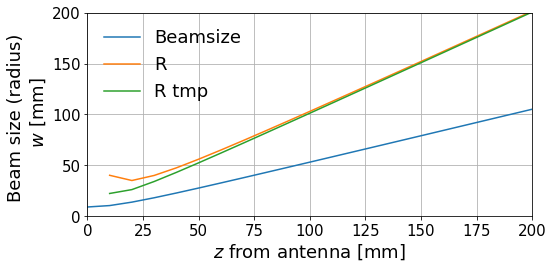

In [71]:
# beam size between antenna and mirror
_dz = 10*mm
#z_antenna_list = np.arange(0*mm, z_mirror, _dz)  # z position from reflection
z_antenna_list = np.arange(0*mm, 1, _dz)  # z position from reflection
beamsize_antenna_list = calc_beamwaist(z=z_antenna_list, w0=w0, wavelength=wavelength)
R_antenna_list = calc_R(z=z_antenna_list, w0=w0, wavelength=wavelength)
print(f'z_antenna_list        = {z_antenna_list/mm} mm')
print(f'beamsize_antenna_list = {beamsize_antenna_list/mm} mm')
print(f'R_antenna_list        = {R_antenna_list/mm} mm')


_R_tmp_list = calc_R(z=z_antenna_list, w0=w0*0.8, wavelength=wavelength)

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(z_antenna_list/mm, beamsize_antenna_list/mm, label='Beamsize')
ax.plot(z_antenna_list/mm, R_antenna_list/mm, label='R')
ax.plot(z_antenna_list/mm, _R_tmp_list/mm, label='R tmp')
ax.set_xlabel('$z$ from antenna [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.legend(frameon=False)
ax.grid(True)
fig.tight_layout()
#ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
ax.set_xlim([0, 200])
ax.set_ylim([0, 200])

## Beam after mirror

In [72]:
height_after_ref = 2*f_mirror / np.sin(slant_angle) * np.abs(np.cos(slant_angle) - 1.)
print(f'height after reflection = {height_after_ref/mm} mm')

height after reflection = 243.39999999999998 mm


In [73]:
z_mirror_list = np.arange(0*mm, 2000*mm+_dz, _dz)  # z position from reflection
beamsize_mirror_list = calc_beamwaist(z=z_mirror_list, w0=w_mirror, wavelength=wavelength)
print(f'z_mirror_list (after mirror) = {z_mirror_list/mm} mm')
print(f'beamsize_mirror_list (after mirror) = {beamsize_mirror_list/mm} mm')

z_mirror_list (after mirror) = [   0.   10.   20. ... 1980. 1990. 2000.] mm
beamsize_mirror_list (after mirror) = [127.1737462  127.17429962 127.17595988 ... 147.28072457 147.47031739
 147.66062007] mm


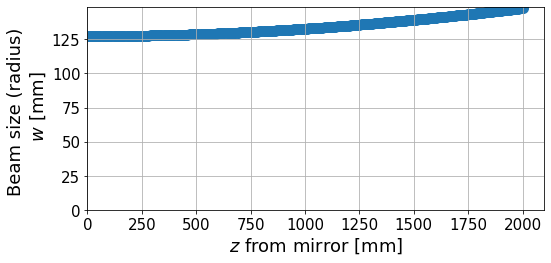

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(z_mirror_list/mm, beamsize_mirror_list/mm, s=100)
ax.set_xlabel('$z$ from mirror [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.tight_layout()

## Beam for all path

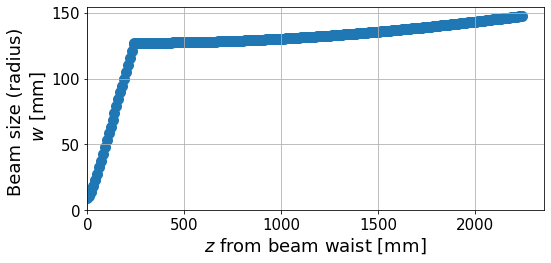

In [101]:
z_mirror_list_from_antenna = z_mirror_list + z_mirror
i_before_mirror = np.where( z_antenna_list < z_mirror)
z_list = np.hstack([z_antenna_list[i_before_mirror], z_mirror_list_from_antenna])
beamsize_list = np.hstack([beamsize_antenna_list[i_before_mirror], beamsize_mirror_list])

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(z_list/mm, beamsize_list/mm, s=100)
ax.set_xlabel('$z$ from beam waist [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.tight_layout()

# Plot CST data

## Functions

In [16]:
def read_CST(filepath, datatype='', verbose=0):
    data = {}
    keys = []
    n_skipline = 0
    if datatype == '3D_E-field':
        keys = ['x', 'y', 'z', 'ExRe', 'ExIm', 'EyRe', 'EyIm', 'EzRe', 'EzIm']
        data = { key: [] for key in keys }
        n_skipline = 2
    elif datatype == '3D_twovalue':
        keys = ['x', 'y', 'z', 'val0', 'val1']
        data = { key: [] for key in keys }
        n_skipline = 2
    else:
        print(f'Error!! There is no datatype for "{datatype}".')
        return -1
        pass
    if verbose > -1: print(f'input file = {filepath} (type={datatype})')
    if verbose > 0: print(f'keys = {keys}')
    
    with open(filepath) as f:
        fin = list( csv.reader(f, delimiter=' ', skipinitialspace=True) )
        for n, line in enumerate(fin):
            if n < n_skipline:
                if verbose > 1: print(f'skip line {n}')
                continue;
            if verbose > 1: print('line:', line)
            for k, key in enumerate(keys):
                data[key].append( float( line[k] ) )
                if verbose > 3: print(f'append data [{key}] = {data[key][-1]}')
                pass
            pass
        pass
    
    # Change to array
    for key in keys:
        data[key] = np.array( data[key] )
        pass
    
    return data

def slice_file(infile, indir, slicekey='x', slice_val=0.):
    _infile_path = f'{indir}/{infile}'
    _data = read_CST(_infile_path, '3D_twovalue' )
    _data_slice = getSlice(_data, slicekey=slicekey, slice_val=slice_val)
    
    return _data_slice

def slice_data(data, slicekey='x', slice_val=0.):
    _data_slice = getSlice(data, slicekey=slicekey, slice_val=slice_val)
    return _data_slice

In [17]:
from scipy.interpolate import griddata
from matplotlib import ticker, cm, colors
colorbarFormat='%.1e'
colorbar_frac=0.2

def plot2D_Eyz(data, logz=False, figsize=(8*(1.+colorbar_frac), 8.), levels=None):
    x_list = np.unique(data['x'])
    y_list = np.unique(data['y'])
    z_list = np.unique(data['z'])
    func.print_list(x_list)
    func.print_list(y_list)
    func.print_list(z_list)

    print(y_list.tolist())
    print(z_list.tolist())

    y_grid, z_grid = np.meshgrid(y_list, z_list)

    EyRe = griddata((data['y'], data['z']), data['EyRe'], (y_grid, z_grid))
    EzRe = griddata((data['y'], data['z']), data['EzRe'], (y_grid, z_grid))
    EyIm = griddata((data['y'], data['z']), data['EyIm'], (y_grid, z_grid))
    EzIm = griddata((data['y'], data['z']), data['EzIm'], (y_grid, z_grid))

    Ey_Mag = np.sqrt( np.power(EyRe, 2.) + np.power(EyIm, 2.) )
    Ez_Mag = np.sqrt( np.power(EzRe, 2.) + np.power(EzIm, 2.) )
    E_Mag = np.sqrt( np.power(Ey_Mag, 2.) + np.power(Ez_Mag, 2.) )

    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    locator=ticker.LogLocator() if logz else ticker.MaxNLocator()
    cs = ax.contourf(y_grid, z_grid, E_Mag, levels=levels, cmap='jet', locator=locator)
    cbar = fig.colorbar(cs, ax=ax, format=colorbarFormat, fraction=colorbar_frac)
    cbar.ax.tick_params(labelsize=12)
    ax.set_aspect('equal')
    plt.gca().set_aspect('equal')
    fig.tight_layout()
    
    return fig, ax


def plot2D_key(data, keys=['y', 'z', 'val0'], figsize=(8*(1+colorbar_frac),8), logz=False, levels=None, newgrid=None):
    x = data[keys[0]]
    y = data[keys[1]]
    if newgrid is None:
        x_list = np.unique(x)
        y_list = np.unique(y)
    else:
        x_list = newgrid[0]
        y_list = newgrid[1]
        pass
    func.print_list(x_list)
    func.print_list(y_list)

    x_grid, y_grid = np.meshgrid(x_list, y_list)

    z_grid = griddata((x, y), data[keys[2]], (x_grid, y_grid))

    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    locator=ticker.LogLocator() if logz else ticker.MaxNLocator()
    cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)
    cbar = fig.colorbar(cs, ax=ax, format=colorbarFormat, fraction=colorbar_frac)
    cbar.ax.tick_params(labelsize=12)
    ax.set_aspect('equal')
    plt.gca().set_aspect('equal')
    fig.tight_layout()
    
    return fig, ax, {'x':x_grid.flatten(), 'y':y_grid.flatten(), 'z':z_grid.flatten()}

In [18]:
def get_index_data(data, indices):
    newdata = {}
    for _c in data.keys():
        if isinstance(data[_c], list) or isinstance(data[_c], np.ndarray):
            newdata[_c] = data[_c][indices]
        else:
            newdata[_c] = data[_c]
            pass
        pass
    return newdata

def getSlice(data, slicekey='x', slice_val=0.):
    val = data[slicekey]
    diff = np.abs(val - slice_val)
    min_diff = min(diff)+0.01
    slice_index = np.where( diff < min_diff )[0]
    print(f'getSlice min_diff = {min_diff}')
    data_slice = get_index_data(data, slice_index)
    return data_slice

In [19]:
import lmfit

def gauss_fit(x, y, x_fit_range=None, xlim=None, verbose=0):
    
    if x_fit_range is not None:
        _index = np.where( (x >x_fit_range[0] ) & (x < x_fit_range[1]) )
        _x = x[_index]
        _y = y[_index]
    else:
        _x = x
        _y = y
        pass
    
    model = lmfit.models.ConstantModel() +  lmfit.models.GaussianModel()
    
    params = model.make_params()
    params['c'].set(value=0., min=0., max=1000, vary=False)
    params['amplitude'].set(value=max(y), min=0., max=None, vary=True)
    params['sigma'].set(value=20., min=0., max=1000., vary=True)
    params['center'].set(value=x[np.where(y==max(y))][0], min=-1000., max=1000, vary=True)
    
    result = model.fit(x=_x, data=_y, weights=None, params=params, method='leastsq')

    if verbose > 0:
        print(params)
        print(result.fit_report())
        print(result.ci_report())
        pass
    
    fig = result.plot(data_kws={'markersize': 5})
    fig.set_figwidth(12)
    fig.set_figheight(4)
    axes = fig.get_axes()
    
    xlim = [min(x), max(x)] if xlim is None else xlim
    axes[1].scatter(x, y, lw=1, c='tab:blue', s=10)
    axes[0].set_xlim(xlim)
    axes[1].set_xlim(xlim)
    axes[0].grid(True)
    axes[1].grid(True)
    
    fig.tight_layout()
    
    return result

# Convert: gaussian sigma ( exp(-x^2/2sigma^2) ) to  beam size ( E = E0 exp(-x^2/w^2) )
def sigma2beamsize(sigma):
    return np.sqrt(2.) * sigma

In [20]:
def get_fwhm_from_half(x, y):
    x_half = func.getX(x, y, 0.5*max(y))
    n_x_half = len(x_half)
    if n_x_half != 2:
        print('Warning! There are several candidates for the x with y=0.5*ymax.')
        print(f'x candidates = {x_half}')
        print('Use two x closer to 0.')
        i_order = np.argsort( np.abs(x_half) )
        new_x_half = [0., 0.]
        new_x_half[0] = x_half[i_order[0]]
        new_x_half[1] = x_half[i_order[1]]
        x_half = new_x_half
        print(f'x_half = {x_half}')
        pass
    fwhm = np.abs(x_half[1] - x_half[0])
    print('fwhm', fwhm)
    return fwhm

In [21]:
# Fit (z, w) with a gaussian beam propagation
# unit: [m]
def fit_beamsize(z, w, w0_init=None):
    def residual(pars, x, data=None, eps=None):
        # unpack parameters: extract .value attribute for each parameter
        parvals = pars.valuesdict()
        w0 = parvals['w0']
        z0 = parvals['z0']
  
        model = calc_beamwaist(z=x+z0, w0=w0, wavelength=wavelength)
  
        if data is None:
            return model
        if eps is None:
            return model - data
        return (model-data) / eps
            
    params = lmfit.Parameters()
    if w0_init is None: w0_init = 1.*mm
    params.add('w0', value=w0_init, vary=True, min=0.*mm, max=100*mm)
    params.add('z0', value=0.*mm, vary=True, min=-100.*mm, max=100*mm)
    result = lmfit.minimize(residual, params, args=(z, w))
        
    print(f'w0 = {result.params["w0"].value/mm} +- {result.params["w0"].stderr/mm} mm')
    print(f'z0 = {result.params["z0"].value/mm} +- {result.params["z0"].stderr/mm} mm')
    print(f'redchi = {result.redchi}')
    print(f'success = {result.success}')
    w0 = result.params['w0'].value
    z0 = result.params['z0'].value
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    _z = np.arange(0, np.max(z)+50*mm, 1*mm)
    ax.scatter(z/mm, w/mm, label='Data')
    ax.plot(_z/mm, calc_beamwaist(z=_z+z0, w0=w0, wavelength=wavelength)/mm, label='Fit', c='tab:red')
    ax.legend(frameon='False')
    
    return result

## v2-0

In [22]:
_indir = 'input/CST/v2-0'
_w_list_mm = np.array([200, 400, 600, 800, 1000, 1200])
_w_list= _w_list_mm * mm
_infile_list = [ f'e-field_abs_ave_w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

_data_list = []
_slicedata_list = []
for _infile in _infile_list:
    print(_infile)
    _data_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    _slicedata_list.append( slice_file(_infile, _indir, 'x', 0.))
    pass

e-field_abs_ave_w200.dat
input file = input/CST/v2-0/e-field_abs_ave_w200.dat (type=3D_twovalue)
input file = input/CST/v2-0/e-field_abs_ave_w200.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w400.dat
input file = input/CST/v2-0/e-field_abs_ave_w400.dat (type=3D_twovalue)
input file = input/CST/v2-0/e-field_abs_ave_w400.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w600.dat
input file = input/CST/v2-0/e-field_abs_ave_w600.dat (type=3D_twovalue)
input file = input/CST/v2-0/e-field_abs_ave_w600.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w800.dat
input file = input/CST/v2-0/e-field_abs_ave_w800.dat (type=3D_twovalue)
input file = input/CST/v2-0/e-field_abs_ave_w800.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w1000.dat
input file = input/CST/v2-0/e-field_abs_ave_w1000.dat (type=3D_twovalue)
input file = input/CST/v2-0/e-field_abs_ave_w1000.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w1200.dat
i

x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]


/tmp/ipykernel_2877798/1443078833.py:61: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0., 0., 0., ..., 0., 0., 0.])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0., 0., 0., ..., 0., 0., 0.])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0., 0., 0., ..., 0., 0., 0.])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -

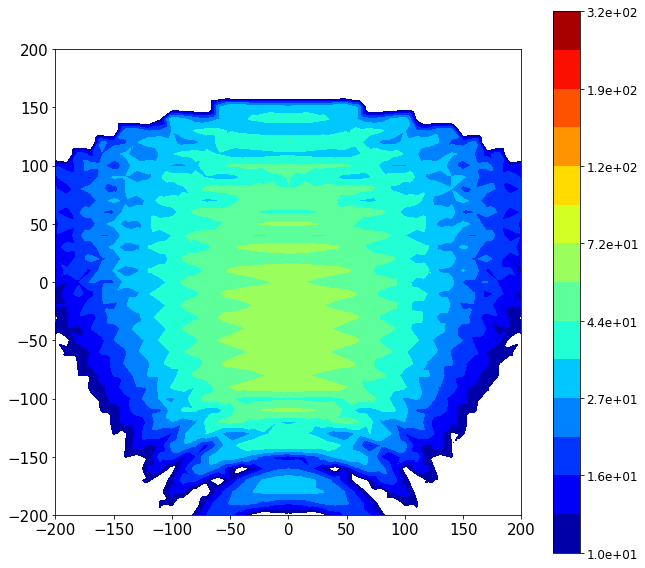

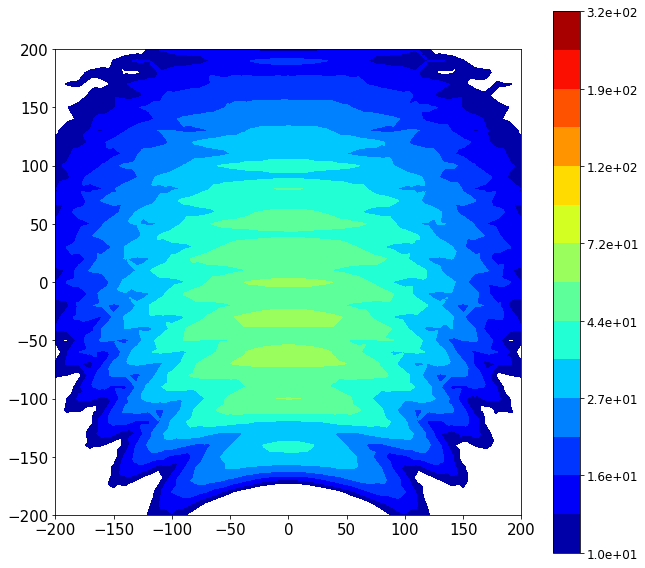

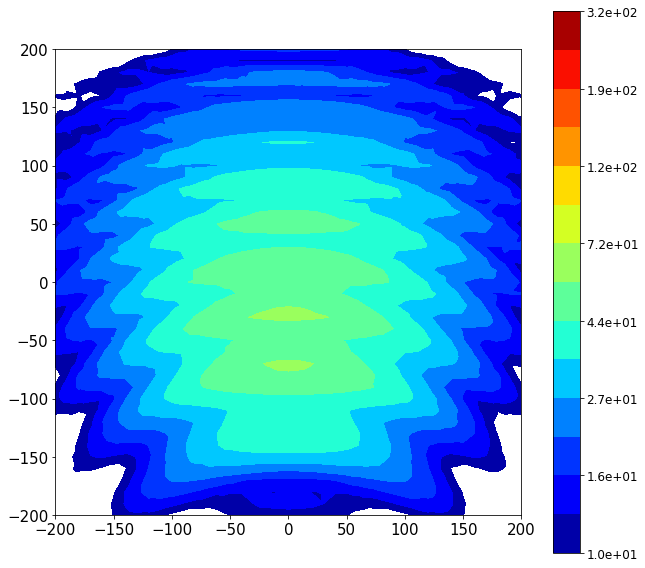

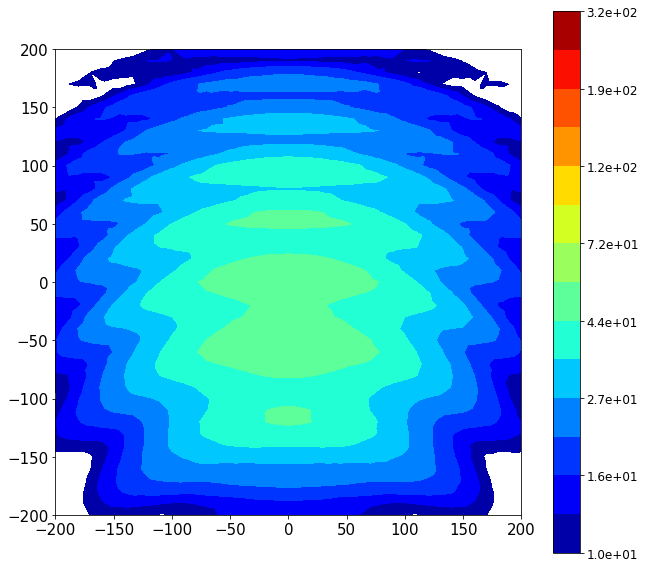

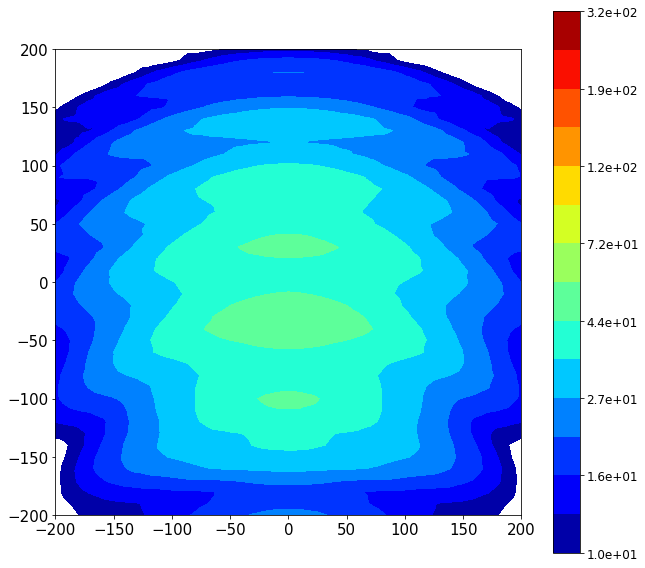

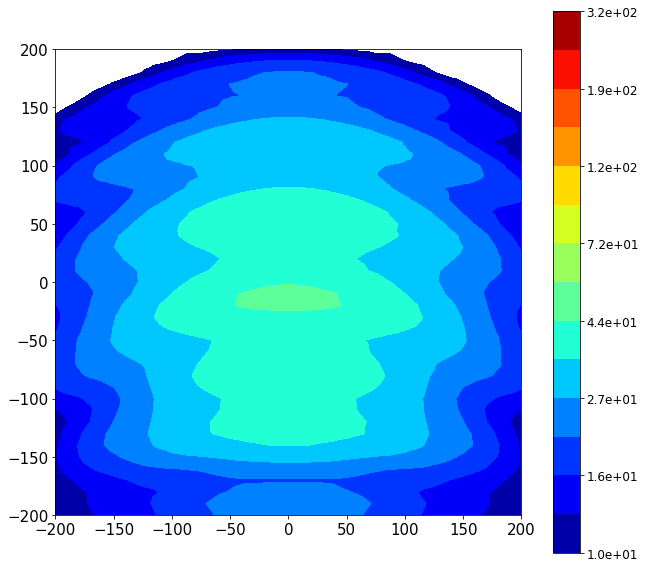

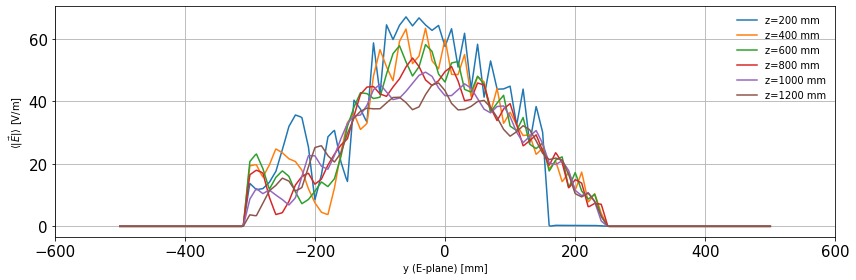

In [23]:
_slicedata_list2 = []
for i, _label in enumerate(_label_list):
    _newgrid = ( np.linspace(-500, 500, 500+1), np.linspace(-500, 500, 500+1) )
    fig, ax, _data = plot2D_key(_data_list[i], keys=['x', 'y', 'val0'], logz=True, 
                         levels=np.power(10., np.linspace(10, 25, 15)/10), 
                         newgrid=_newgrid)

    xlim = [-200, 200]
    ylim = [-200, 200]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    _data['val0'] = _data.pop('z') # key name change: z --> val0
    print(_data)
    _slicedata_list2.append( slice_data(_data, 'x', 0.) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(_label_list, _slicedata_list2):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

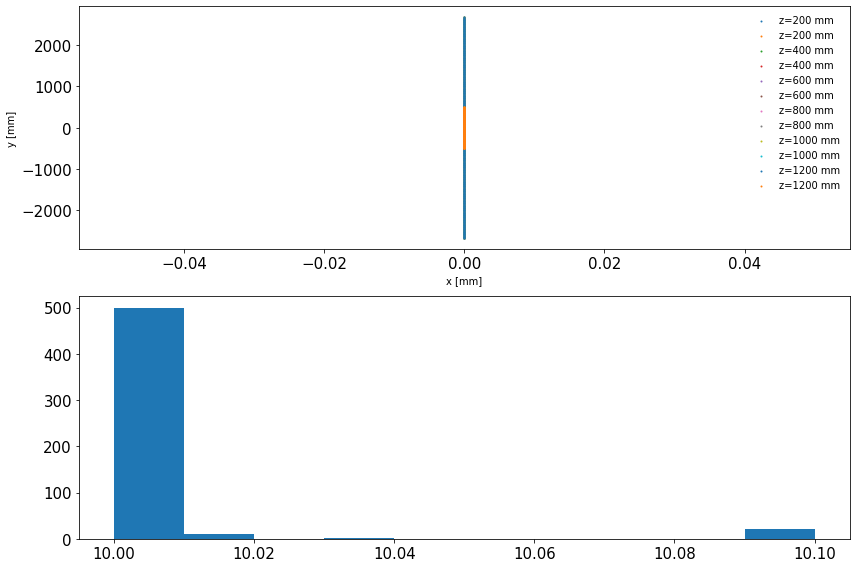

In [24]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
_ax = ax[0]
for i, _label in enumerate(_label_list):
    _ax.scatter(_slicedata_list[i]['x'], _slicedata_list[i]['y'], s=1, label=_label)
    _ax.scatter(_slicedata_list2[i]['x'], _slicedata_list2[i]['y'], s=1, label=_label)
    _ax.set_xlabel('x [mm]')
    _ax.set_ylabel('y [mm]')
    _ax.legend(frameon=False)
    pass

_ax = ax[1]
_ax.hist(np.diff(_slicedata_list[0]['y']))
fig.tight_layout()

fwhm 270.5494080462122
x @ y max = -49.00000000000001
Beam size @ power = 1/e = 160.46 mm / 162.48 mm
fwhm 273.3479061649896
x @ y max = -47.0
Beam size @ power = 1/e = 149.04 mm / 164.16 mm
fwhm 293.56282183473274
x @ y max = -71.0
Beam size @ power = 1/e = 161.59 mm / 176.30 mm
fwhm 305.358609818987
x @ y max = -51.0
Beam size @ power = 1/e = 182.65 mm / 183.39 mm
fwhm 326.6353262024274
x @ y max = -33.0
Beam size @ power = 1/e = 204.33 mm / 196.16 mm
fwhm 364.4745751092196
x @ y max = -13.000000000000002
Beam size @ power = 1/e = 218.09 mm / 218.89 mm


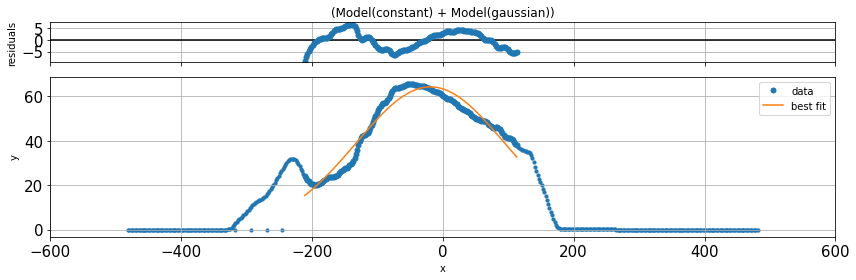

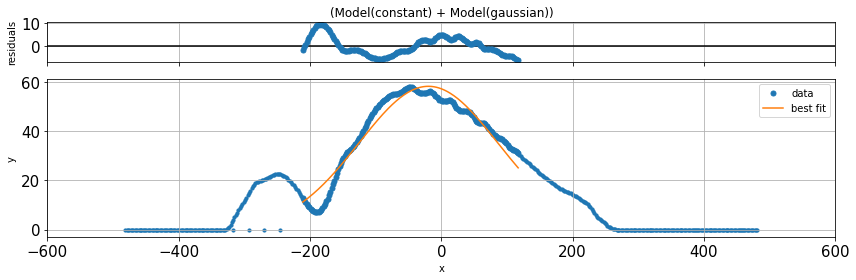

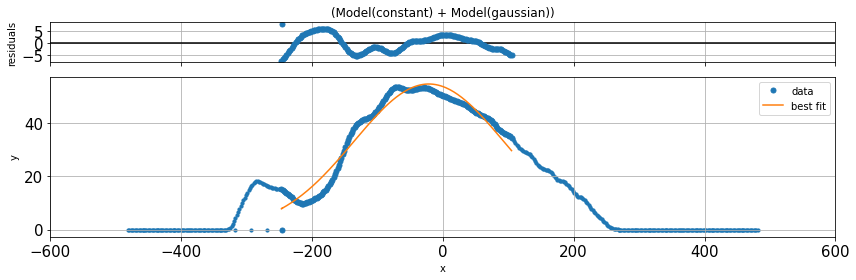

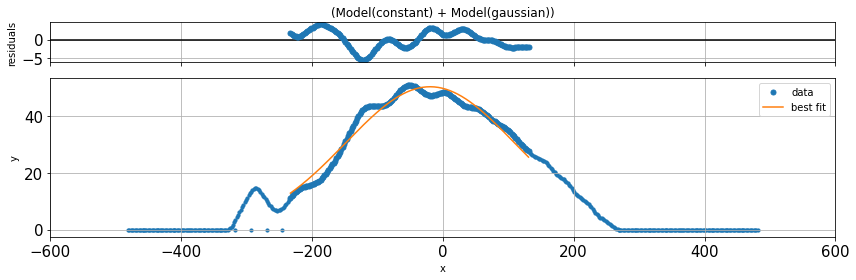

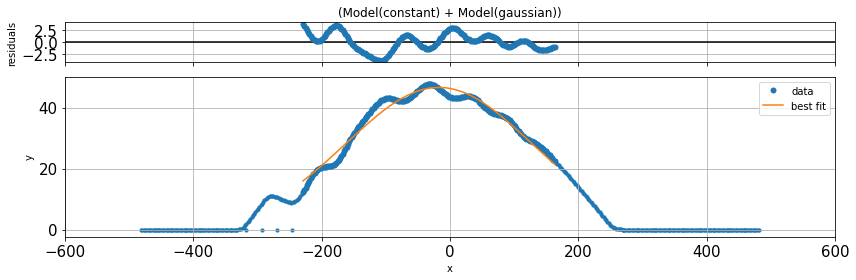

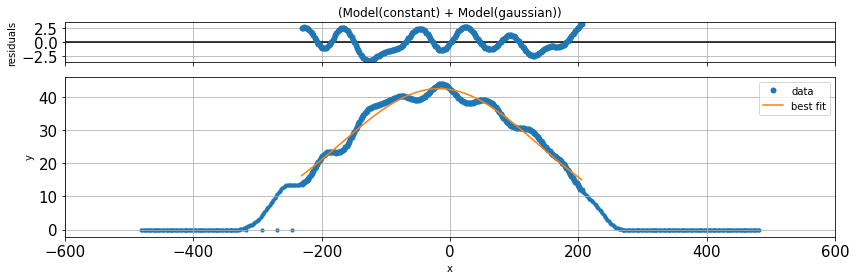

In [25]:
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 20
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list2) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x = np.convolve(_x, _b, mode="same") 
    _y = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x, _y) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*1.0, _x_ymax+_fwhm_from_half*1.0], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

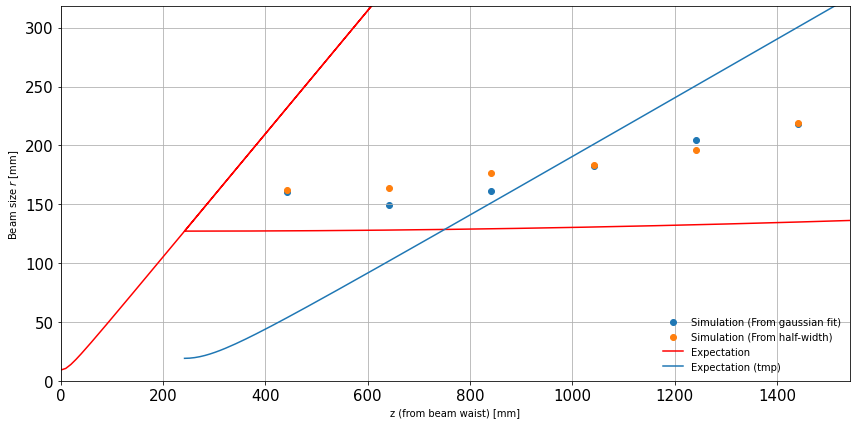

In [26]:
# Expectation
z_exp_list = z_mirror_list + z_mirror
# Temporary Expectation
_beamsize_mirror_list = calc_beamwaist(z=z_mirror_list, w0=w_mirror*0.15, wavelength=wavelength)
# Simulation
_z_list = _w_list + z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(z_list/mm, beamsize_list/mm, label='Expectation', c='red')
ax.plot(z_exp_list/mm, _beamsize_mirror_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm) + 100)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm) + 100)
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

data_list20 = _data_list
slicedata_list20 = _slicedata_list
z_list20 = _z_list
w_list20 = _w_list
beamsize_list20 = _beamsize_list
fitresult_list20 = _fitresult_list

## v2-1
- z_mirror = v2-0 + 15 mm (= 257.19)

In [27]:
_indir = 'input/CST/v2-1'
_w_list_mm = np.array([200, 400, 600, 800, 1000, 1200])
_w_list= _w_list_mm * mm
_infile_list = [ f'e-field_abs_ave_w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

_data_list = []
_slicedata_list = []
for _infile in _infile_list:
    print(_infile)
    _data_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    _slicedata_list.append( slice_file(_infile, _indir, 'x', 0.))
    pass

e-field_abs_ave_w200.dat
input file = input/CST/v2-1/e-field_abs_ave_w200.dat (type=3D_twovalue)
input file = input/CST/v2-1/e-field_abs_ave_w200.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w400.dat
input file = input/CST/v2-1/e-field_abs_ave_w400.dat (type=3D_twovalue)
input file = input/CST/v2-1/e-field_abs_ave_w400.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w600.dat
input file = input/CST/v2-1/e-field_abs_ave_w600.dat (type=3D_twovalue)
input file = input/CST/v2-1/e-field_abs_ave_w600.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w800.dat
input file = input/CST/v2-1/e-field_abs_ave_w800.dat (type=3D_twovalue)
input file = input/CST/v2-1/e-field_abs_ave_w800.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w1000.dat
input file = input/CST/v2-1/e-field_abs_ave_w1000.dat (type=3D_twovalue)
input file = input/CST/v2-1/e-field_abs_ave_w1000.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w1200.dat
i

x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]


/tmp/ipykernel_2877798/1443078833.py:61: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0., 0., 0., ..., 0., 0., 0.])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0., 0., 0., ..., 0., 0., 0.])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0., 0., 0., ..., 0., 0., 0.])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -

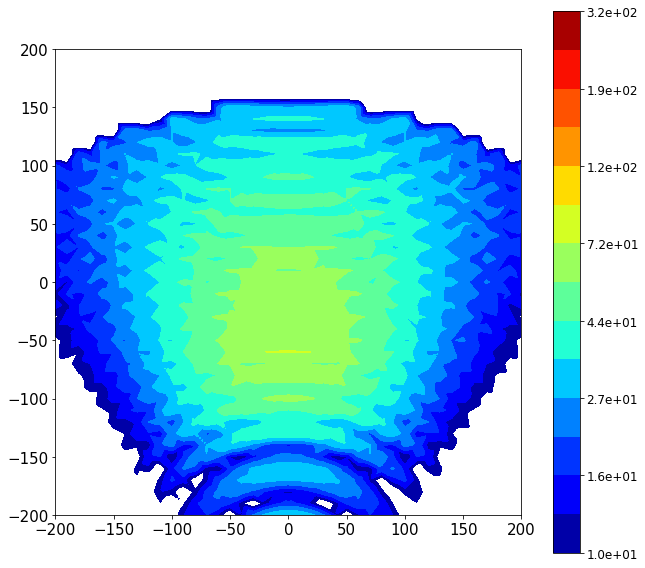

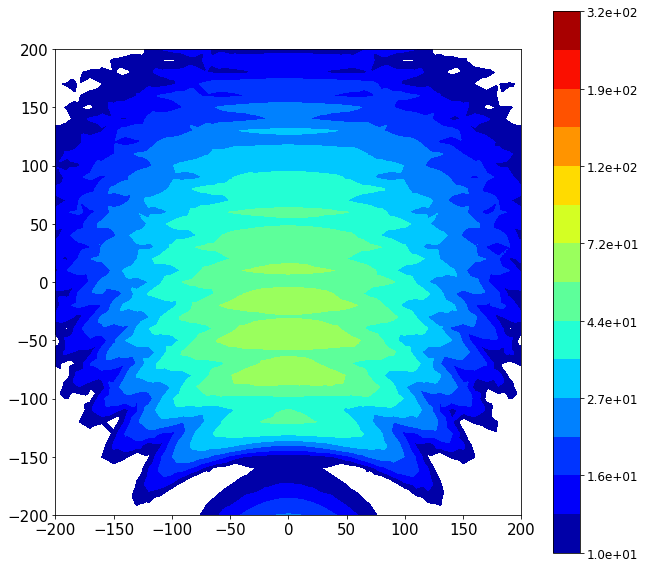

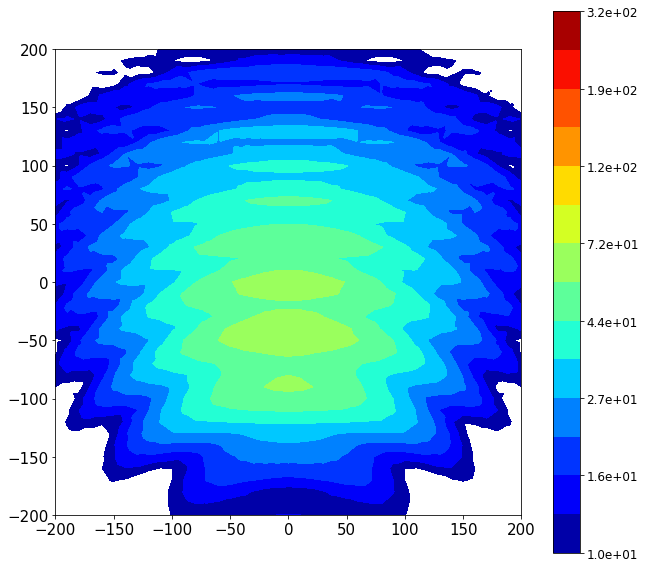

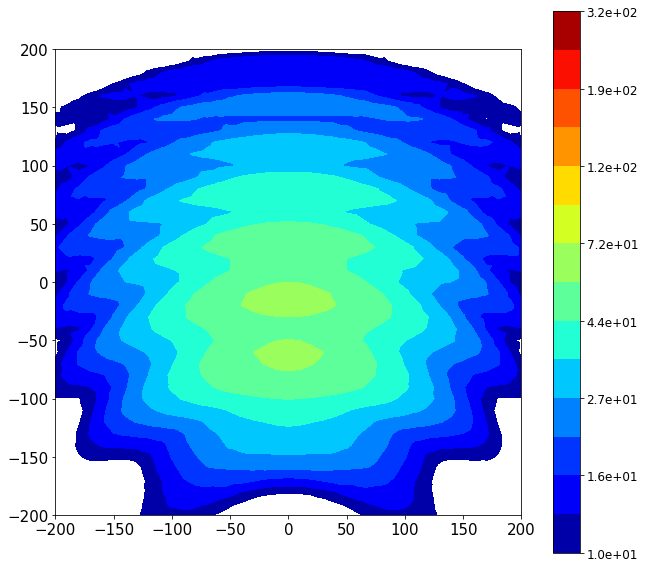

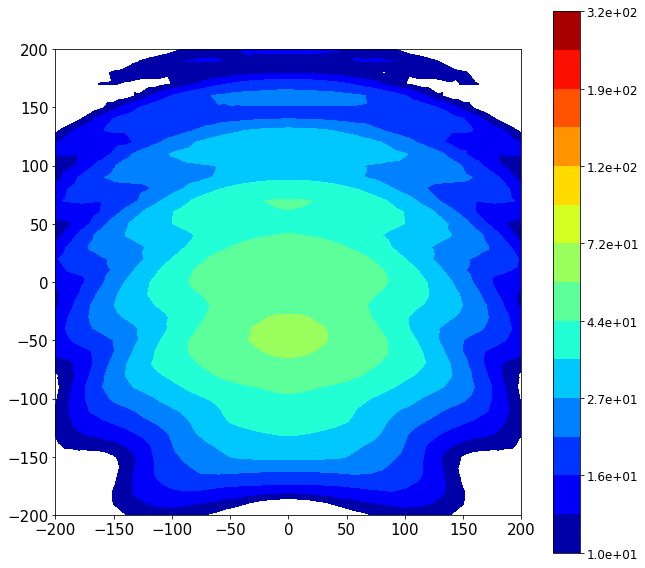

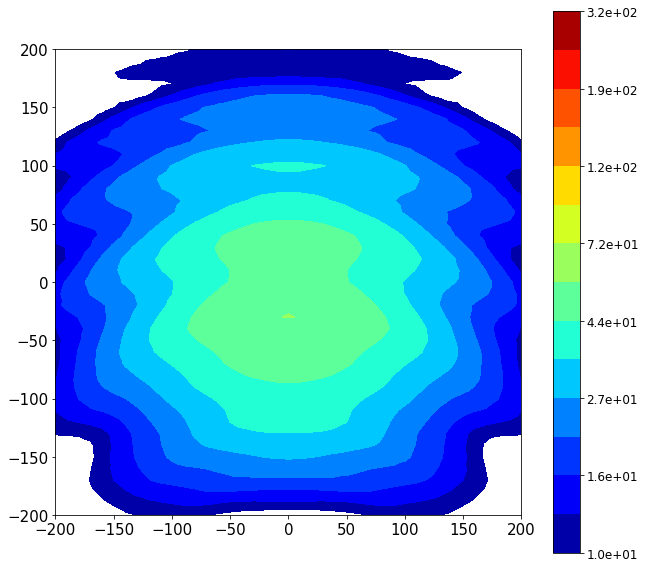

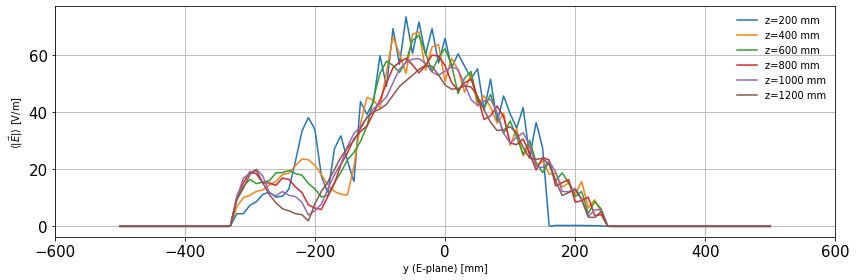

In [28]:
_slicedata_list2 = []
for i, _label in enumerate(_label_list):
    _newgrid = ( np.linspace(-500, 500, 500+1), np.linspace(-500, 500, 500+1) )
    fig, ax, _data = plot2D_key(_data_list[i], keys=['x', 'y', 'val0'], logz=True, 
                         levels=np.power(10., np.linspace(10, 25, 15)/10), 
                         newgrid=_newgrid)

    xlim = [-200, 200]
    ylim = [-200, 200]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    _data['val0'] = _data.pop('z') # key name change: z --> val0
    print(_data)
    _slicedata_list2.append( slice_data(_data, 'x', 0.) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(_label_list, _slicedata_list2):
    ax.plot( _data['y'], _data['val0'], label=_label)
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

fwhm 260.9027235305734
x @ y max = -45.0
Beam size @ power = 1/e = 138.60 mm / 156.69 mm
fwhm 237.07733599504928
x @ y max = -33.0
Beam size @ power = 1/e = 135.95 mm / 142.38 mm
fwhm 240.60644172144424
x @ y max = -43.0
Beam size @ power = 1/e = 134.09 mm / 144.50 mm
fwhm 255.51535526517142
x @ y max = -17.0
Beam size @ power = 1/e = 154.48 mm / 153.45 mm
fwhm 268.400975747685
x @ y max = -47.0
Beam size @ power = 1/e = 148.33 mm / 161.19 mm
fwhm 271.9658750757005
x @ y max = -29.000000000000004
Beam size @ power = 1/e = 160.43 mm / 163.33 mm


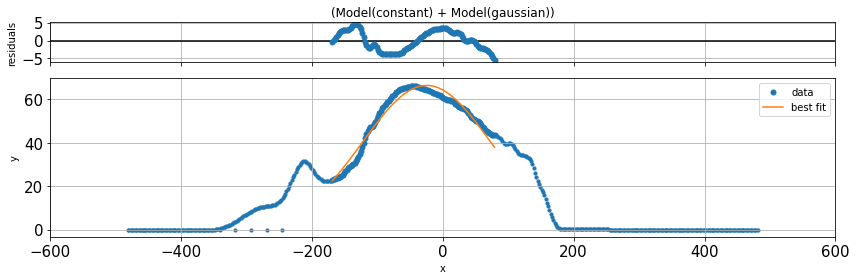

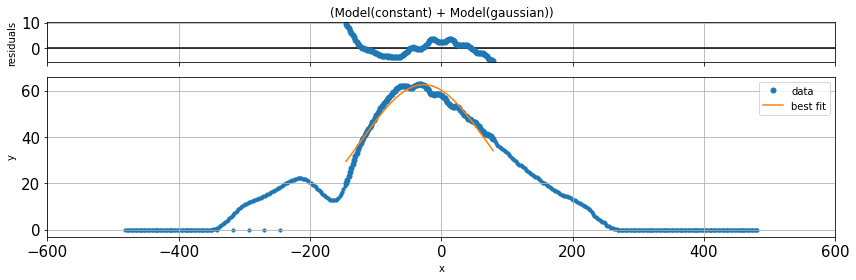

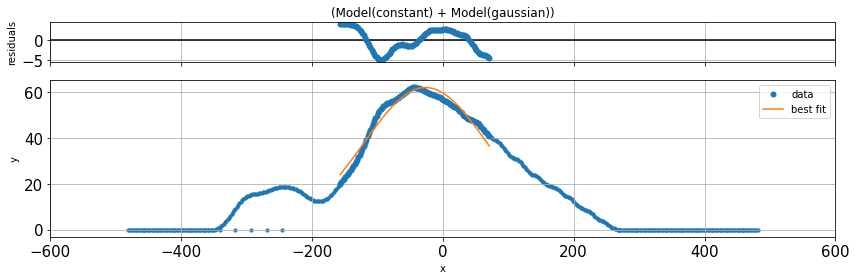

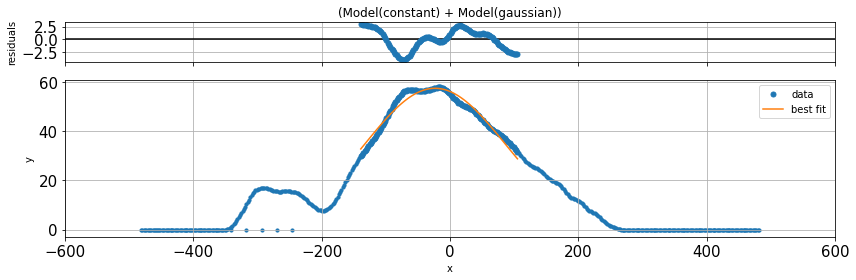

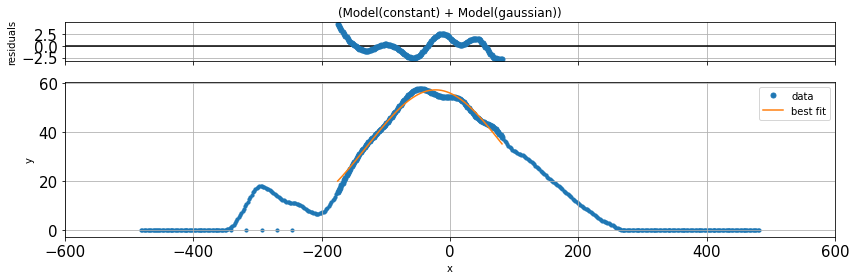

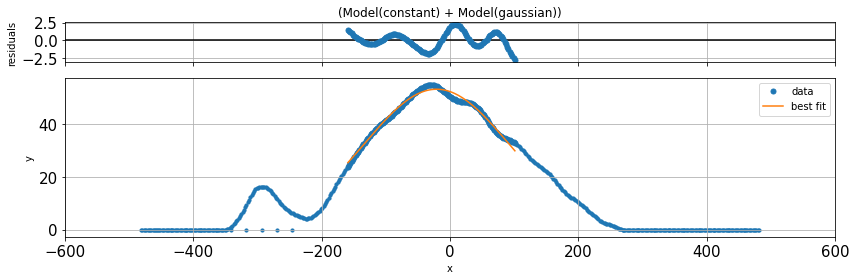

In [29]:
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 20
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list2) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x = np.convolve(_x, _b, mode="same") 
    _y = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x, _y) )
    _beamsize2_list.append( _fwhm_from_half )
    if _fwhm_from_half <=0: _fwhm_from_half = 100
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _x_range_sf = 0.8
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*_x_range_sf, _x_ymax+_fwhm_from_half*_x_range_sf], 
                        xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]:.2f} mm / {_beamsize2_list[-1]:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

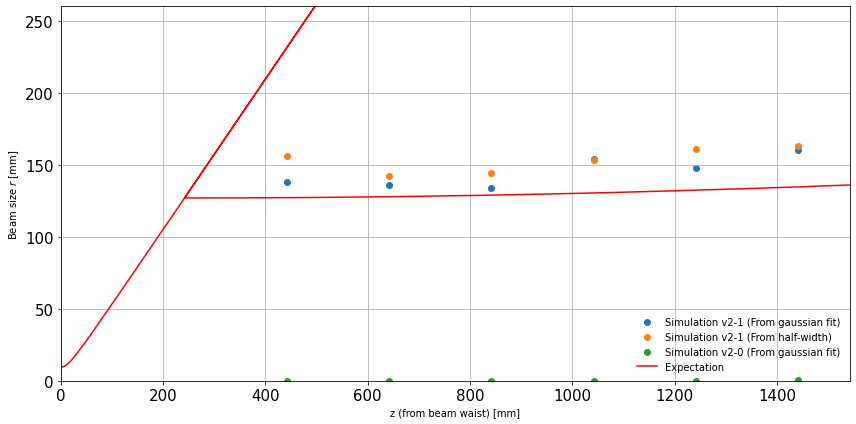

In [30]:
# Expectation
z_exp_list = z_mirror_list + z_mirror
# Temporary Expectation
_beamsize_mirror_list = calc_beamwaist(z=z_mirror_list, w0=w_mirror*0.15, wavelength=wavelength)
# Simulation
_z_list = _w_list + z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list[0:]/mm, _beamsize_list[0:], label='Simulation v2-1 (From gaussian fit)')
ax.scatter(_z_list[0:]/mm, _beamsize2_list[0:], label='Simulation v2-1 (From half-width)')
ax.scatter(z_list20[0:]/mm, beamsize_list20[0:], label='Simulation v2-0 (From gaussian fit)')
ax.plot(z_list/mm, beamsize_list/mm, label='Expectation', c='red')
#ax.plot(z_exp_list/mm, _beamsize_mirror_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm) + 100)
ax.set_ylim(bottom=0, top=max(_beamsize_list) + 100)
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

data_list21 = _data_list
slicedata_list21 = _slicedata_list
z_list21 = _z_list
w_list21 = _w_list
beamsize_list21 = _beamsize_list
fitresult_list21 = _fitresult_list

## v2 Antenna Only

In [78]:
_indir = 'input/CST/v2_AntennaOnly'
_w_list_mm = np.array([60, 80, 100, 120, 150, 200, 250, 300, 350, 400, 450, 480])
_w_list= _w_list_mm * mm
_infile_list = [ f'e-filed_abs_ave_w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

_data_list = []
_slicedata_list = []
for _infile in _infile_list:
    print(_infile)
    _data_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    #_slicedata_list.append( slice_file(_infile, _indir, 'x', 0.))
    _slicedata_list.append( slice_file(_infile, _indir, 'x', 2.5))
    pass

e-filed_abs_ave_w60.dat
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w60.dat (type=3D_twovalue)
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w60.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-filed_abs_ave_w80.dat
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w80.dat (type=3D_twovalue)
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w80.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-filed_abs_ave_w100.dat
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w100.dat (type=3D_twovalue)
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w100.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-filed_abs_ave_w120.dat
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w120.dat (type=3D_twovalue)
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w120.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-filed_abs_ave_w150.dat
input file = input/CST/v2_AntennaOnly/e-filed_abs_ave_w150.dat (type=3D_twovalue)
input file = input/CST/v2_AntennaOnly/e-fil

x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0.59533 , 0.61155 , 0.604322, ..., 0.604322, 0.61155 , 0.59533 ])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0.60412 , 0.636608, 0.655584, ..., 0.655584, 0.636608, 0.60412 ])}
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
{'x': array([-500., -498., -496., ...,  496.,  498.,  500.]), 'y': array([-500., -500., -500., ...,  500.,  500.,  500.]), 'val0': array([0.56344 , 0.

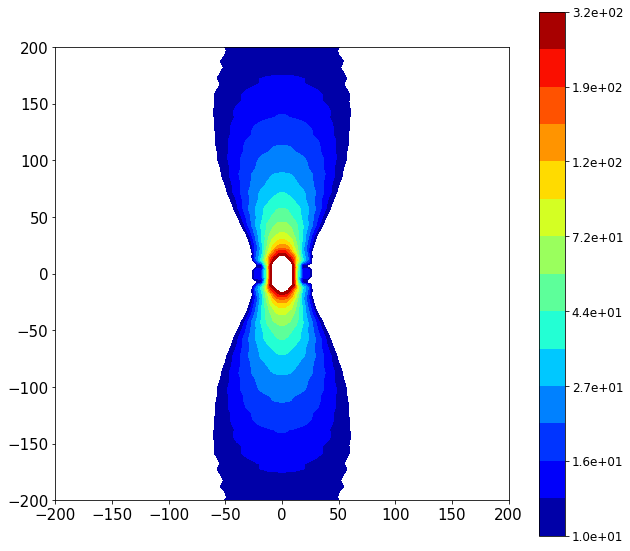

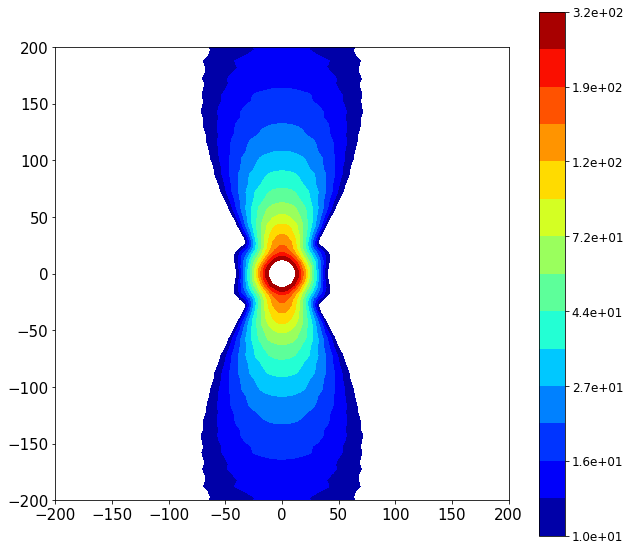

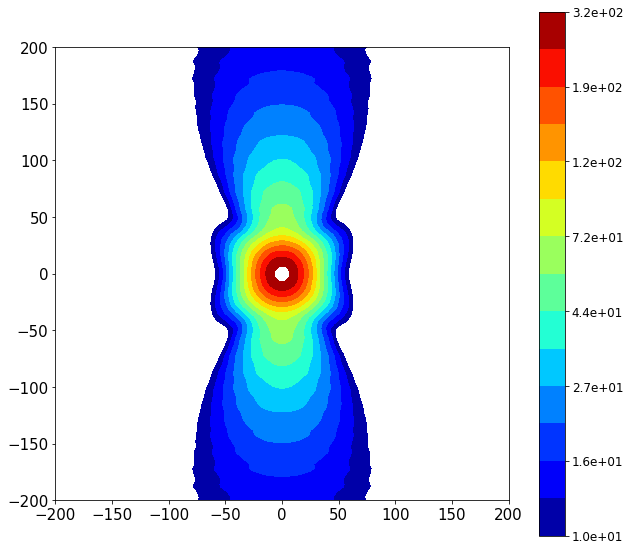

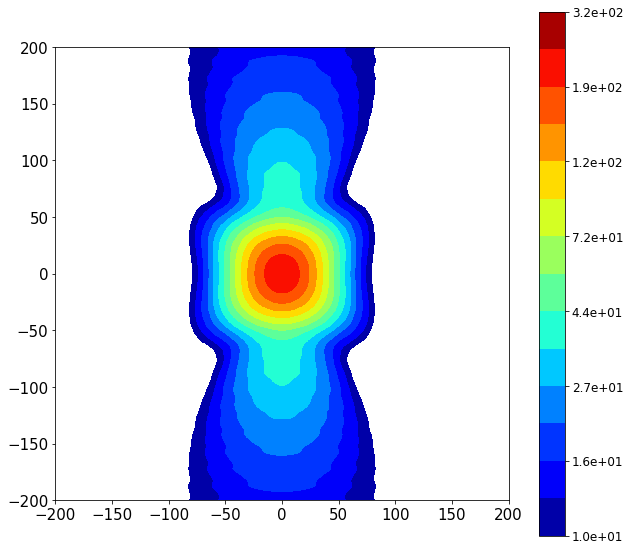

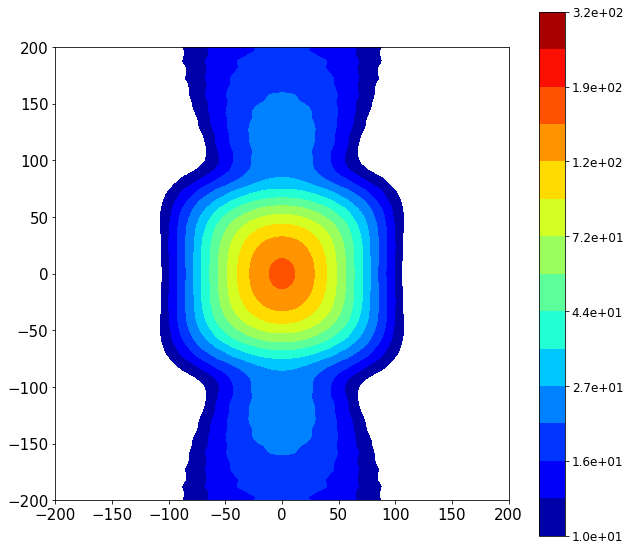

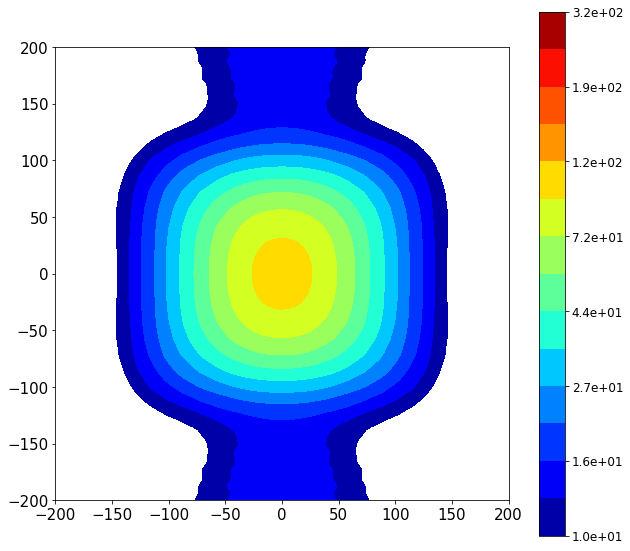

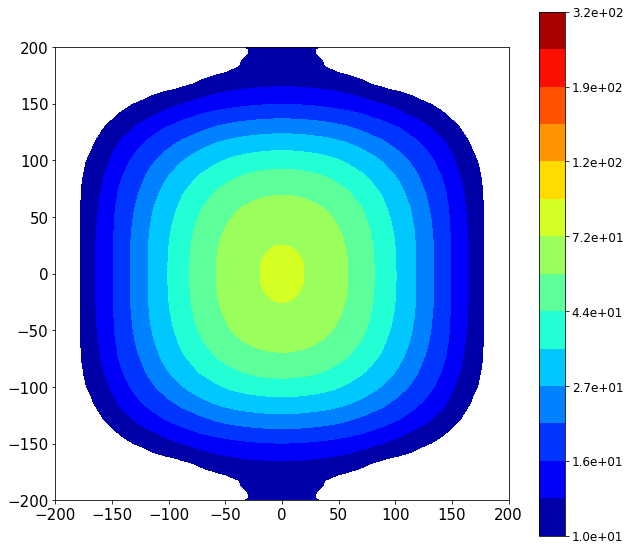

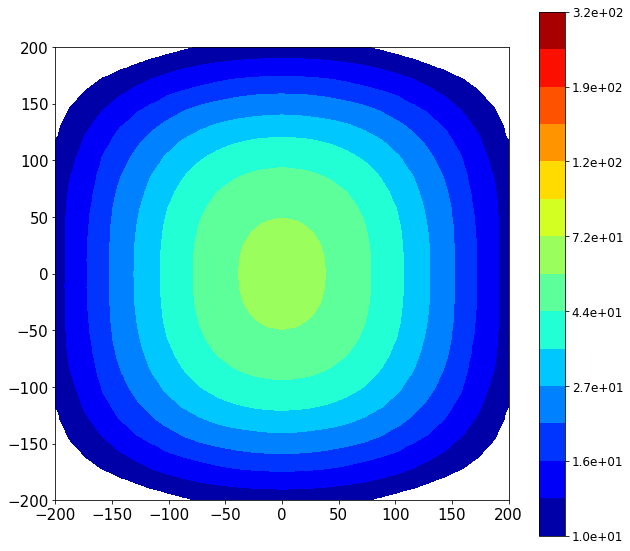

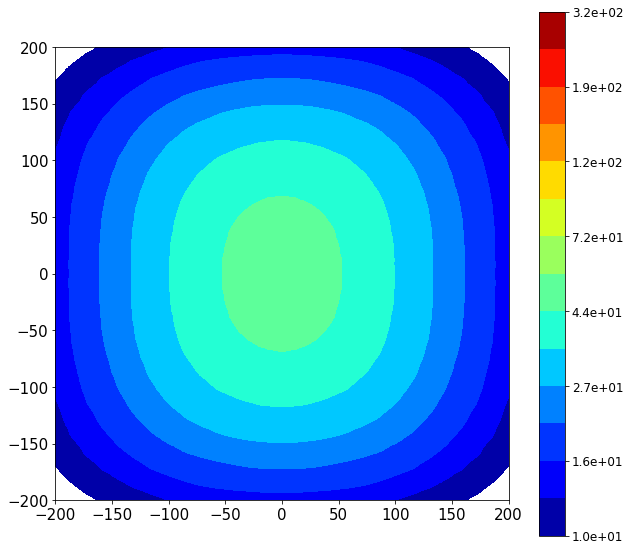

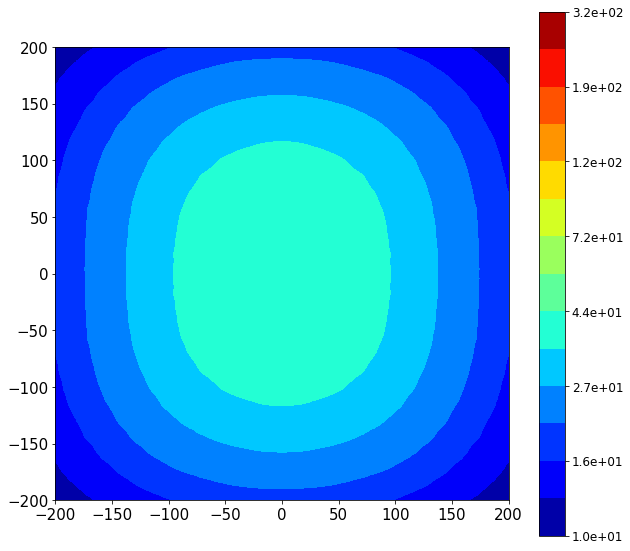

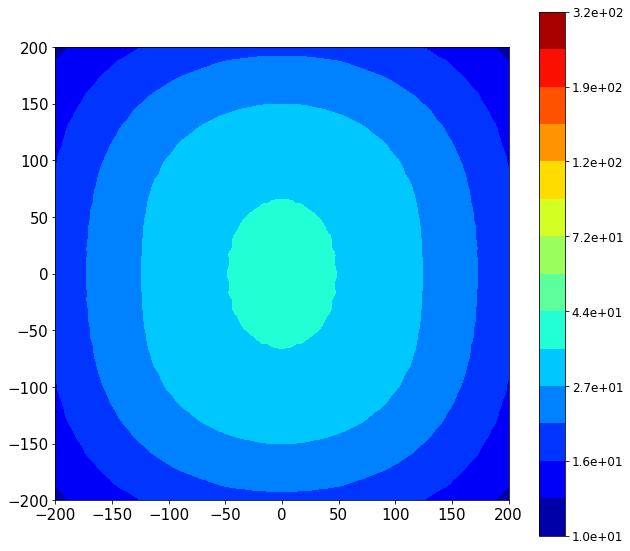

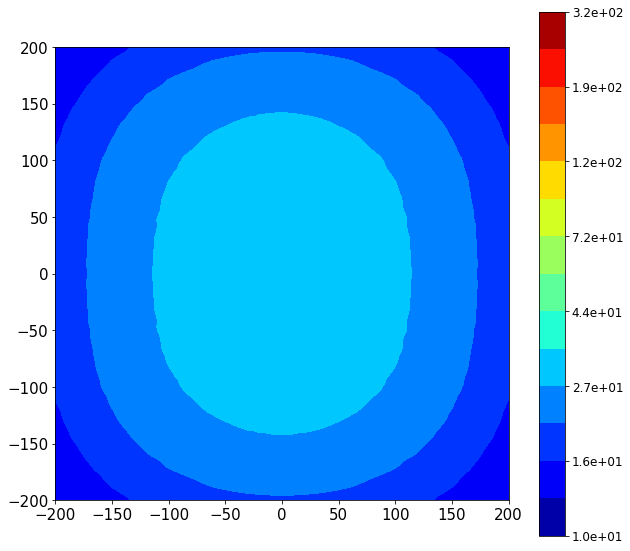

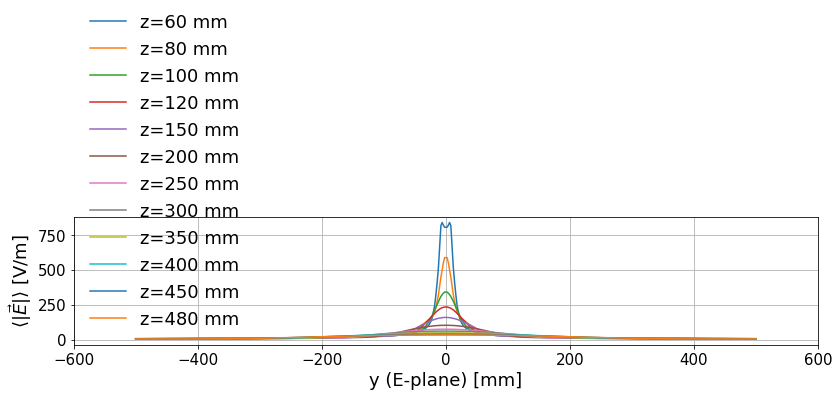

In [79]:
_slicedata_list2 = []
for i, _label in enumerate(_label_list):
    _newgrid = ( np.linspace(-500, 500, 500+1), np.linspace(-500, 500, 500+1) )
    fig, ax, _data = plot2D_key(_data_list[i], keys=['x', 'y', 'val0'], logz=True, 
                         levels=np.power(10., np.linspace(10, 25, 15)/10), 
                         newgrid=_newgrid)

    xlim = [-200, 200]
    ylim = [-200, 200]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    _data['val0'] = _data.pop('z') # key name change: z --> val0
    print(_data)
    _slicedata_list2.append( slice_data(_data, 'x', 0.) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(_label_list, _slicedata_list2):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

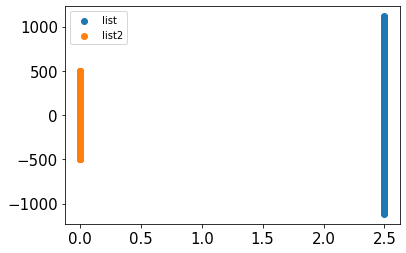

In [33]:
_x = _slicedata_list[0]['x']
_y = _slicedata_list[0]['y']
plt.scatter(_x, _y, label='list')
_x = _slicedata_list2[0]['x']
_y = _slicedata_list2[0]['y']
plt.scatter(_x, _y, label='list2')
plt.legend()

fwhm 27.730625096584763
x @ y max = 6.0
Beam size @ power = 1/e = 17.69 mm / 16.65 mm
fwhm 26.300283777050875
x @ y max = -2.0
Beam size @ power = 1/e = 15.69 mm / 15.79 mm
fwhm 44.72561151911178
x @ y max = -2.0
Beam size @ power = 1/e = 26.97 mm / 26.86 mm
fwhm 66.35784652609746
x @ y max = -2.0
Beam size @ power = 1/e = 39.81 mm / 39.85 mm
fwhm 98.23988613818685
x @ y max = -2.0
Beam size @ power = 1/e = 59.17 mm / 59.00 mm
fwhm 152.63790658310077
x @ y max = -2.0
Beam size @ power = 1/e = 91.82 mm / 91.67 mm
fwhm 207.69341961509372
x @ y max = -2.0
Beam size @ power = 1/e = 124.73 mm / 124.73 mm
fwhm 261.54459251665816
x @ y max = -6.0
Beam size @ power = 1/e = 156.57 mm / 157.07 mm
fwhm 318.6959706959707
x @ y max = -2.0
Beam size @ power = 1/e = 190.10 mm / 191.40 mm
fwhm 373.1060387171337
x @ y max = 8.0
Beam size @ power = 1/e = 222.06 mm / 224.07 mm
fwhm 425.50623441396505
x @ y max = -2.0
Beam size @ power = 1/e = 256.58 mm / 255.54 mm
fwhm 459.2299794661191
x @ y max = -2.0


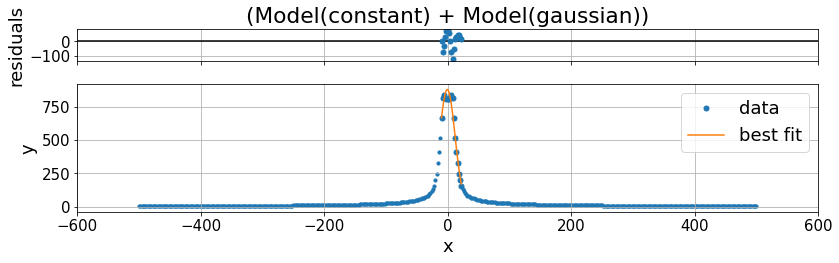

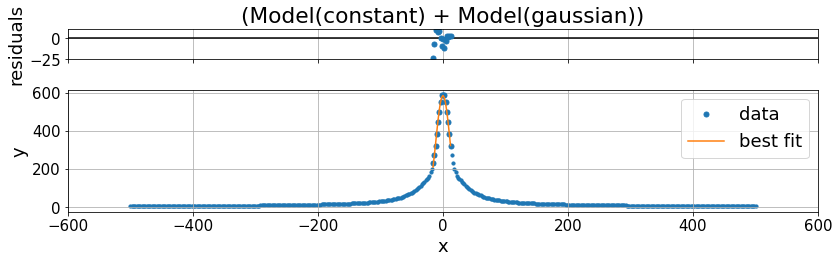

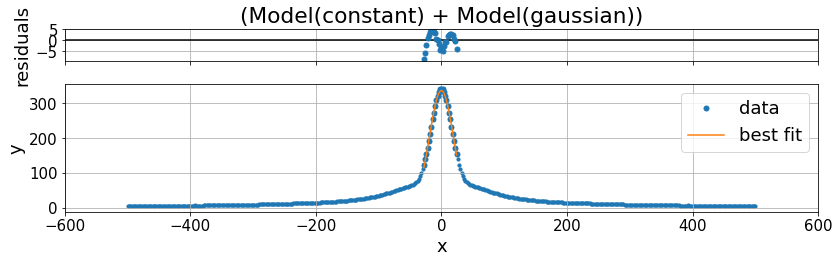

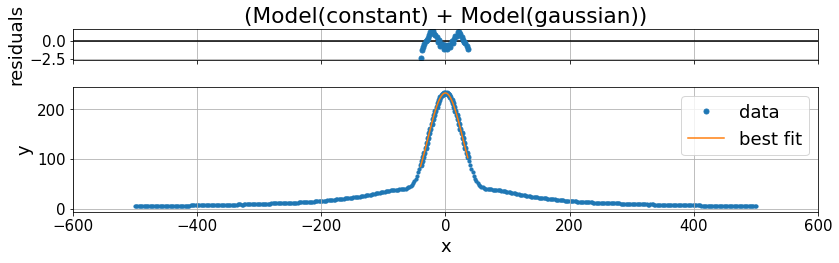

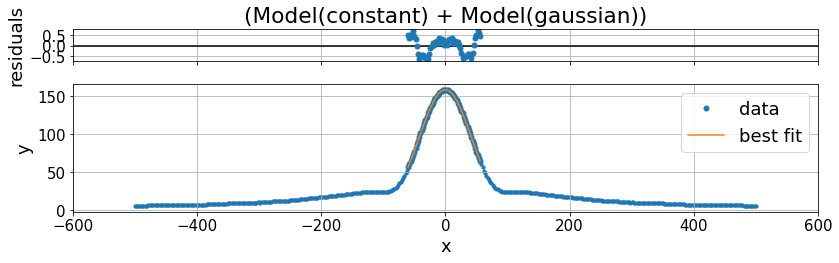

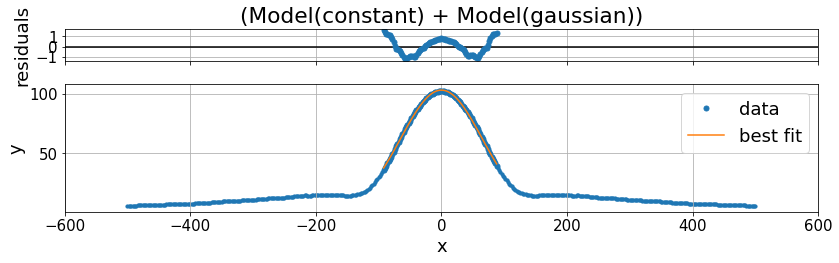

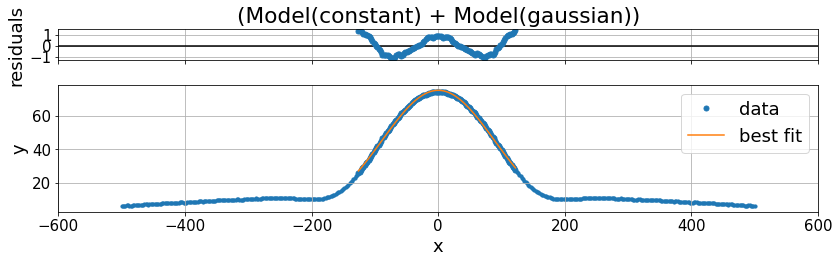

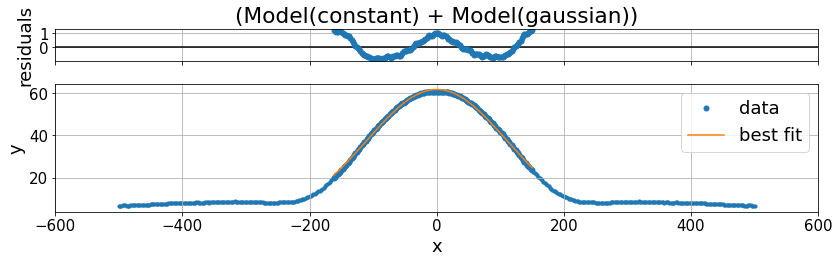

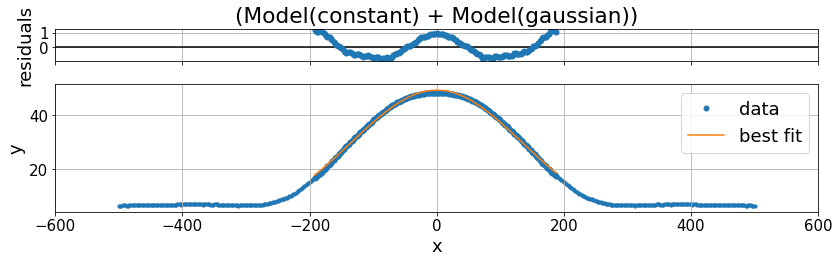

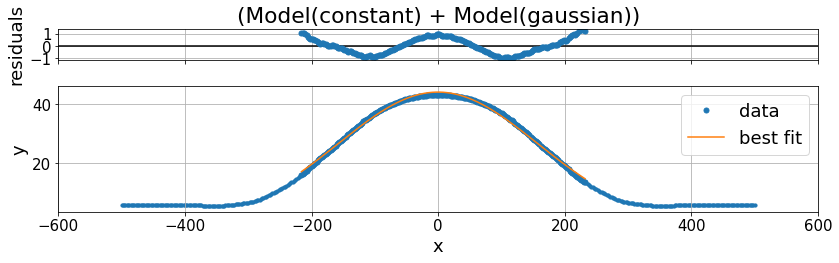

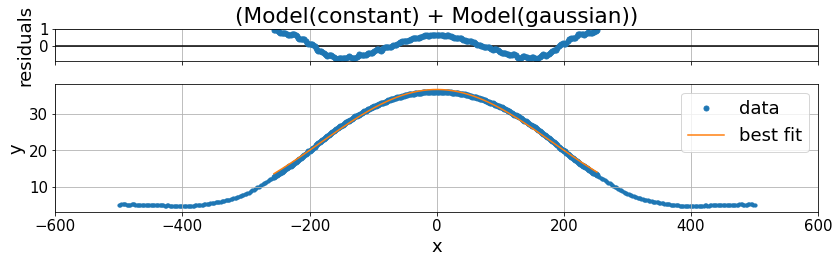

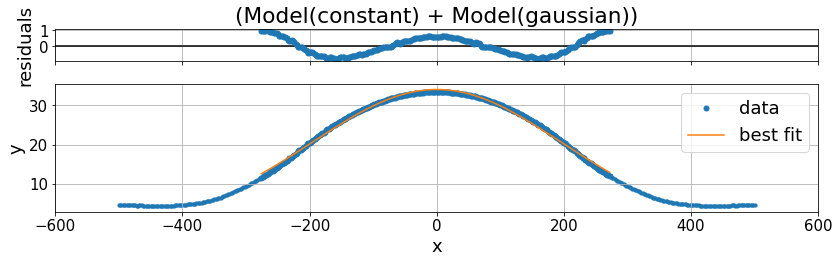

In [80]:
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 1
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list2) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x = np.convolve(_x, _b, mode="same") 
    _y = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x, _y) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*1.0, _x_ymax+_fwhm_from_half*1.0], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

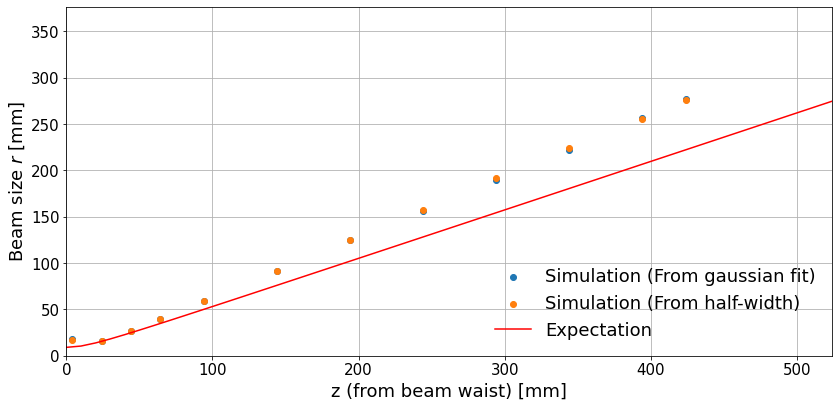

In [81]:
# Temporary Expectation
_z_tmp_list = z_antenna_list
_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list - L_waist

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(z_antenna_list/mm, beamsize_antenna_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm) + 100)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm) + 100)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

data_list2Antenna = _data_list
slicedata_list2Antenna = _slicedata_list
z_list2Antenna = _z_list
w_list2Antenna = _w_list
beamsize_list2Antenna = _beamsize_list
fitresult_list2Antenna = _fitresult_list

w0 = 7.267862592110269 +- 0.08324044979442881 mm
z0 = -4.586965441016347 +- 2.8323235278786996 mm
redchi = 1.1267799669324372e-05
success = True
w0 = 7.266639803354969 +- 0.07496207605948688 mm
z0 = -4.341829897128307 +- 2.552633139354547 mm
redchi = 9.154413403878219e-06
success = True


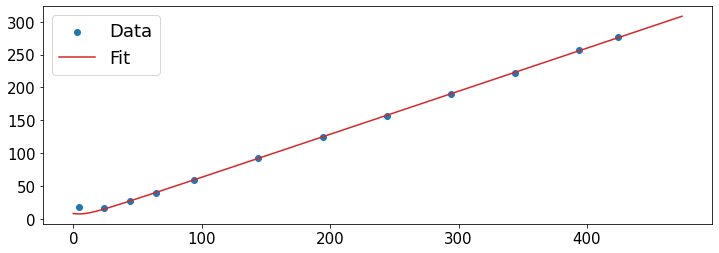

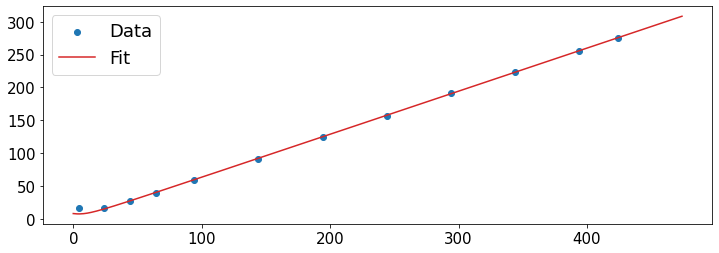

In [82]:
fit_beamsize(_z_list, _beamsize_list, w0)
fit_beamsize(_z_list, _beamsize2_list, w0)

## v3 Antenna Only

In [83]:
_indir = 'input/CST/v3_AntennaOnly'
_w_list_mm = np.array([60, 80, 100, 120, 150, 200, 250, 300, 350, 400, 450, 480])
_w_list= _w_list_mm * mm
_infile_list = [ f'e-field_abs_ave_w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

_data_list = []
_slicedata_list = []
for _infile in _infile_list:
    print(_infile)
    _data_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    #_slicedata_list.append( slice_file(_infile, _indir, 'x', 0.))
    _slicedata_list.append( slice_file(_infile, _indir, 'x', 2.5))
    pass

e-field_abs_ave_w60.dat
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w60.dat (type=3D_twovalue)
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w60.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w80.dat
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w80.dat (type=3D_twovalue)
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w80.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w100.dat
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w100.dat (type=3D_twovalue)
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w100.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w120.dat
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w120.dat (type=3D_twovalue)
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w120.dat (type=3D_twovalue)
getSlice min_diff = 0.01
e-field_abs_ave_w150.dat
input file = input/CST/v3_AntennaOnly/e-field_abs_ave_w150.dat (type=3D_twovalue)
input file = input/CST/v3_AntennaOnly/e-fie

In [ ]:
_slicedata_list2 = []
for i, _label in enumerate(_label_list):
    _newgrid = ( np.linspace(-500, 500, 500+1), np.linspace(-500, 500, 500+1) )
    fig, ax, _data = plot2D_key(_data_list[i], keys=['x', 'y', 'val0'], logz=True, 
                         levels=np.power(10., np.linspace(10, 25, 15)/10), 
                         newgrid=_newgrid)

    xlim = [-200, 200]
    ylim = [-200, 200]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    _data['val0'] = _data.pop('z') # key name change: z --> val0
    #print(_data)
    _slicedata_list2.append( slice_data(_data, 'x', 0.) )
    pass

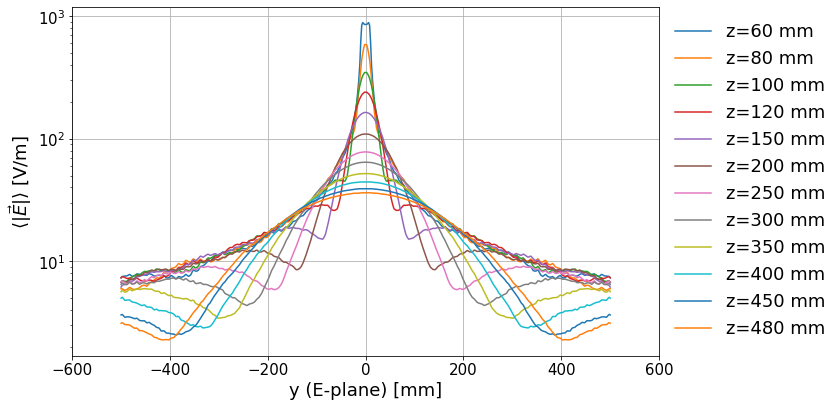

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
for _label, _data in zip(_label_list, _slicedata_list2):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.grid(True)
ax.set_yscale('log')
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

fwhm 23.21659922668825
x @ y max = -6.0
Beam size @ power = 1/e = 14.57 mm / 13.94 mm
fwhm 25.036835535018913
x @ y max = -2.0
Beam size @ power = 1/e = 15.04 mm / 15.04 mm
fwhm 40.519861830742656
x @ y max = -2.0
Beam size @ power = 1/e = 24.30 mm / 24.33 mm
fwhm 57.83134772896501
x @ y max = -2.0
Beam size @ power = 1/e = 34.74 mm / 34.73 mm
fwhm 84.38388522283654
x @ y max = -2.0
Beam size @ power = 1/e = 50.79 mm / 50.68 mm
fwhm 129.58305975049245
x @ y max = -2.0
Beam size @ power = 1/e = 77.84 mm / 77.82 mm
fwhm 175.61742329236688
x @ y max = -2.0
Beam size @ power = 1/e = 105.84 mm / 105.47 mm
fwhm 220.86028751123092
x @ y max = -2.0
Beam size @ power = 1/e = 132.63 mm / 132.64 mm
fwhm 267.42729970326405
x @ y max = -2.0
Beam size @ power = 1/e = 160.12 mm / 160.61 mm
fwhm 314.9563557010365
x @ y max = 8.0
Beam size @ power = 1/e = 187.81 mm / 189.15 mm
fwhm 358.93674293405115
x @ y max = -2.0
Beam size @ power = 1/e = 216.22 mm / 215.56 mm
fwhm 385.7086584912672
x @ y max = -8.

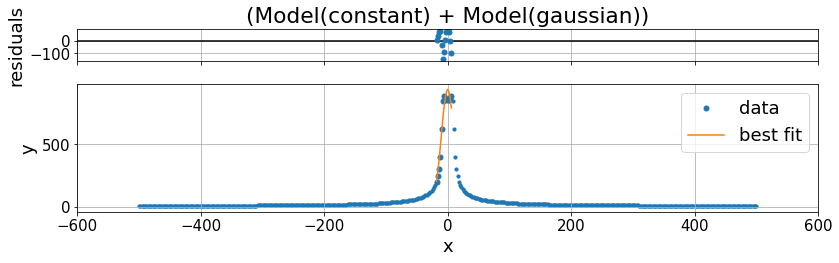

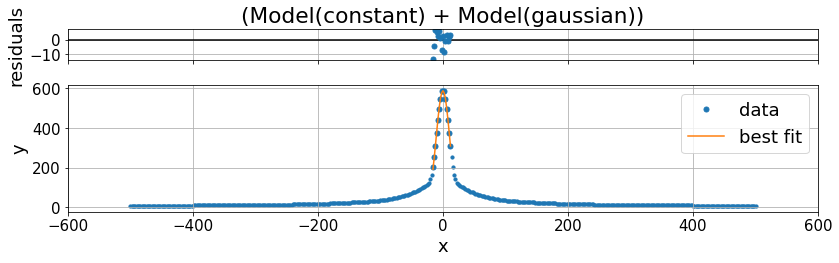

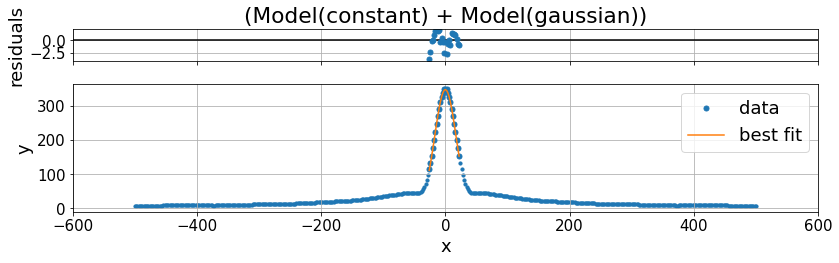

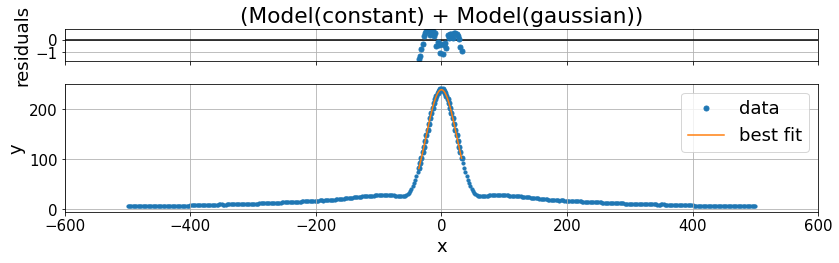

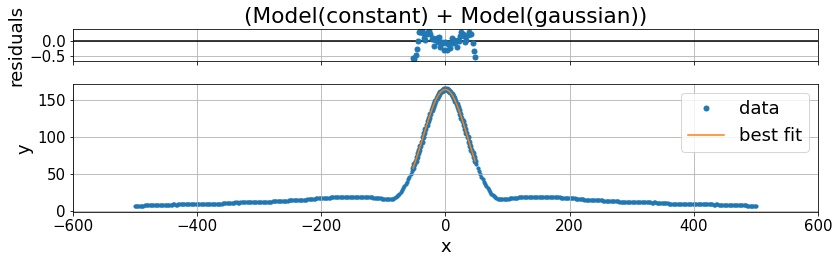

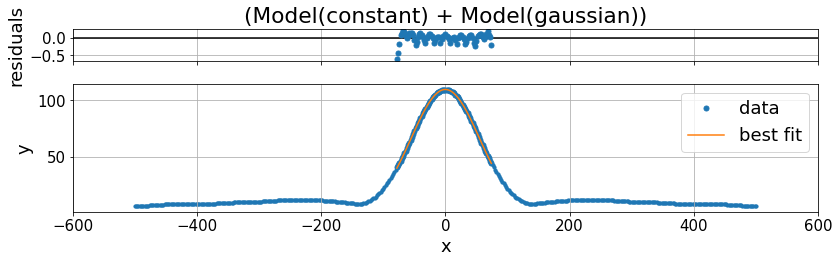

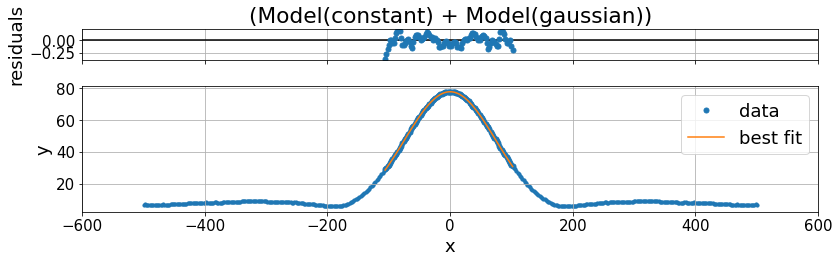

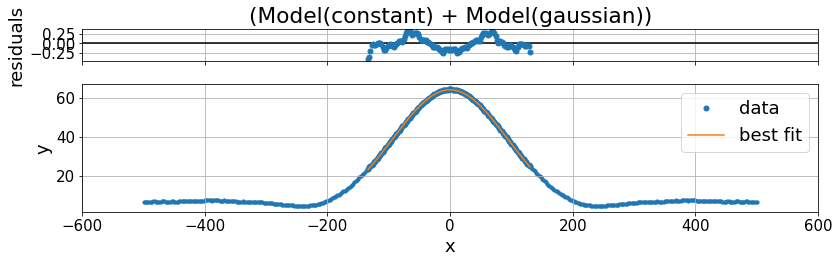

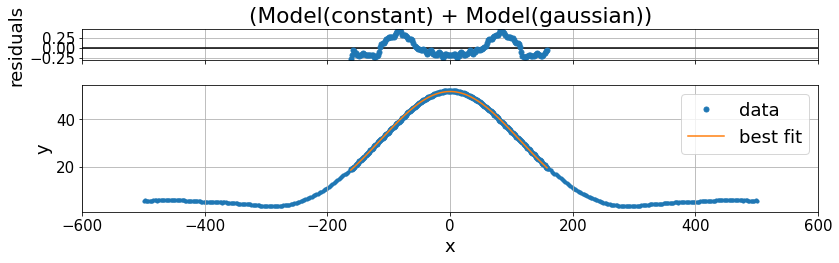

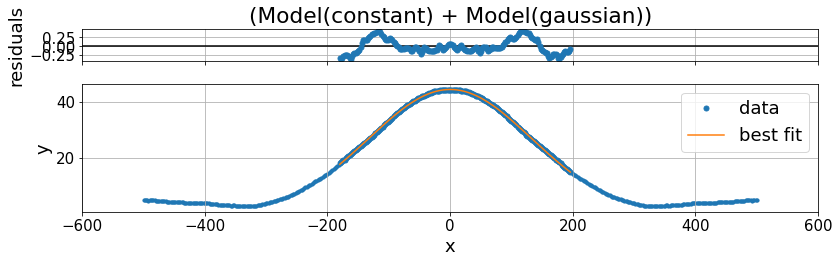

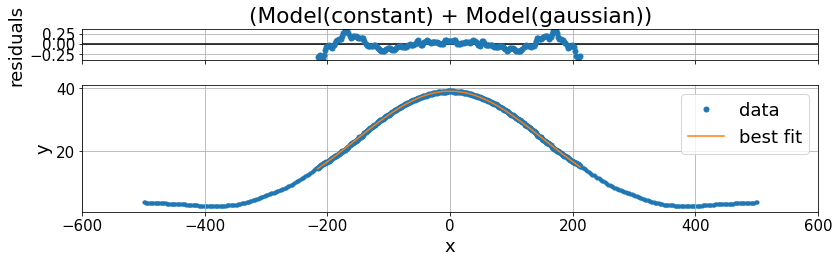

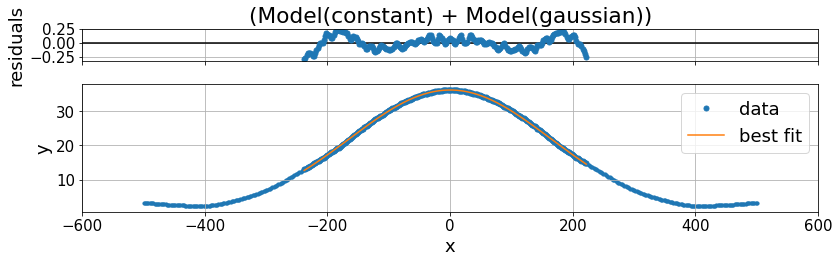

In [87]:
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 1
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list2) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x = np.convolve(_x, _b, mode="same") 
    _y = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x, _y) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*1.0, _x_ymax+_fwhm_from_half*1.0], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

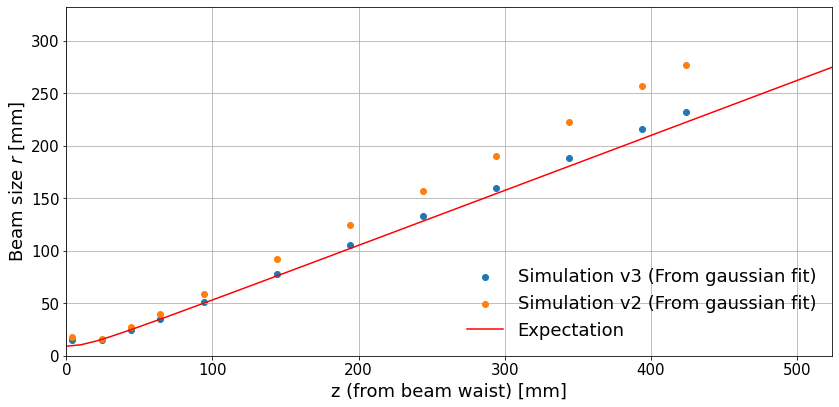

In [89]:
# Temporary Expectation
_z_tmp_list = z_antenna_list
_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list - L_waist

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation v3 (From gaussian fit)')
#ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.scatter(z_list2Antenna/mm, beamsize_list2Antenna/mm, label='Simulation v2 (From gaussian fit)')
ax.plot(z_antenna_list/mm, beamsize_antenna_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm) + 100)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm) + 100)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

data_list3Antenna = _data_list
slicedata_list3Antenna = _slicedata_list
z_list3Antenna = _z_list
w_list3Antenna = _w_list
beamsize_list3Antenna = _beamsize_list
fitresult_list3Antenna = _fitresult_list

w0 = 8.679963114470446 +- 0.06731676029643201 mm
z0 = -2.5811397827313063 +- 1.9448646906449343 mm
redchi = 3.5793192467785913e-06
success = True
w0 = 8.679113344054151 +- 0.06115438435057052 mm
z0 = -2.5915982756774536 +- 1.7669619942332613 mm
redchi = 2.9549213724279006e-06
success = True


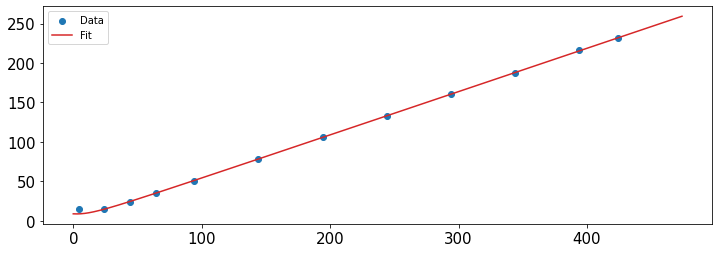

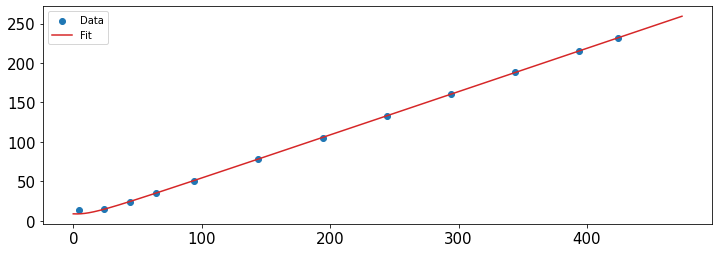

In [41]:
fit_beamsize(_z_list, _beamsize_list, w0)
fit_beamsize(_z_list, _beamsize2_list, w0)

## v3-0
- f: 121.7 (v2: 132.676)

In [96]:
_indir = 'input/CST/v3-0/E-field_abs_ave/'
_w_list_mm = np.array([200, 400, 600, 800, 1000])
_w_list= _w_list_mm * mm
_infile_list = [ f'w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

_data_list = []
_slicedata_list = []
for _infile in _infile_list:
    print(_infile)
    _data_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    #_slicedata_list.append( slice_file(_infile, _indir, 'x', 0.))
    _slicedata_list.append( slice_file(_infile, _indir, 'x', 2.5))
    pass

w200.dat
input file = input/CST/v3-0/E-field_abs_ave//w200.dat (type=3D_twovalue)
input file = input/CST/v3-0/E-field_abs_ave//w200.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w400.dat
input file = input/CST/v3-0/E-field_abs_ave//w400.dat (type=3D_twovalue)
input file = input/CST/v3-0/E-field_abs_ave//w400.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w600.dat
input file = input/CST/v3-0/E-field_abs_ave//w600.dat (type=3D_twovalue)
input file = input/CST/v3-0/E-field_abs_ave//w600.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w800.dat
input file = input/CST/v3-0/E-field_abs_ave//w800.dat (type=3D_twovalue)
input file = input/CST/v3-0/E-field_abs_ave//w800.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w1000.dat
input file = input/CST/v3-0/E-field_abs_ave//w1000.dat (type=3D_twovalue)
input file = input/CST/v3-0/E-field_abs_ave//w1000.dat (type=3D_twovalue)
getSlice min_diff = 2.51


x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]


/tmp/ipykernel_2877798/1443078833.py:61: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
getSlice min_diff = 0.01


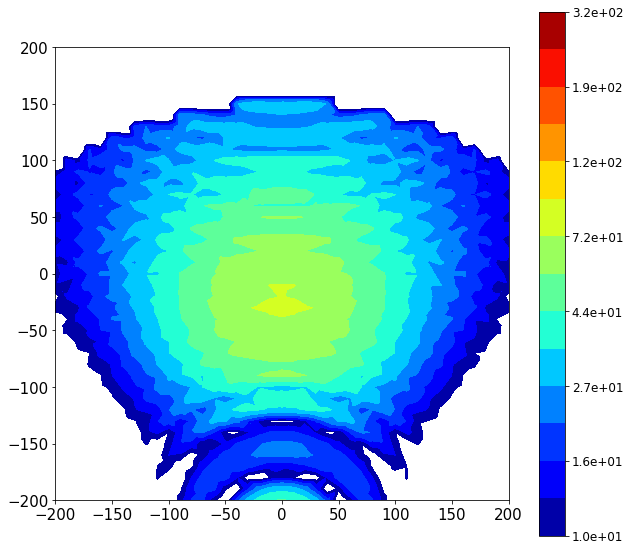

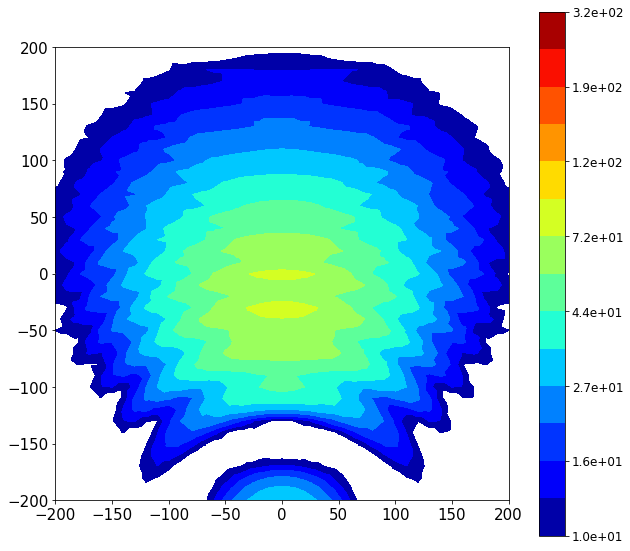

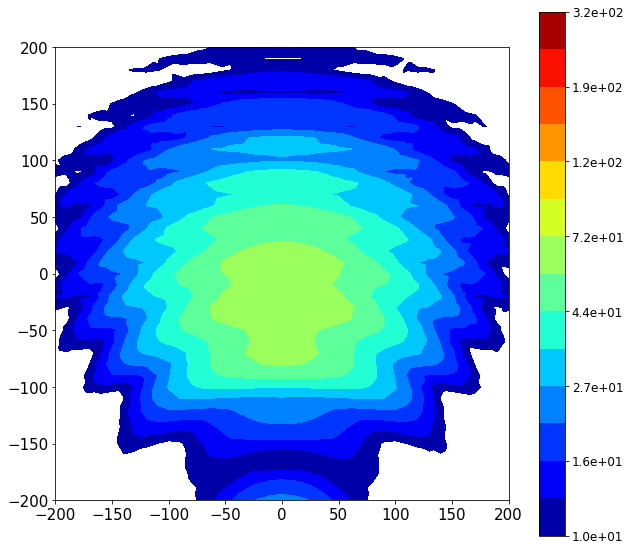

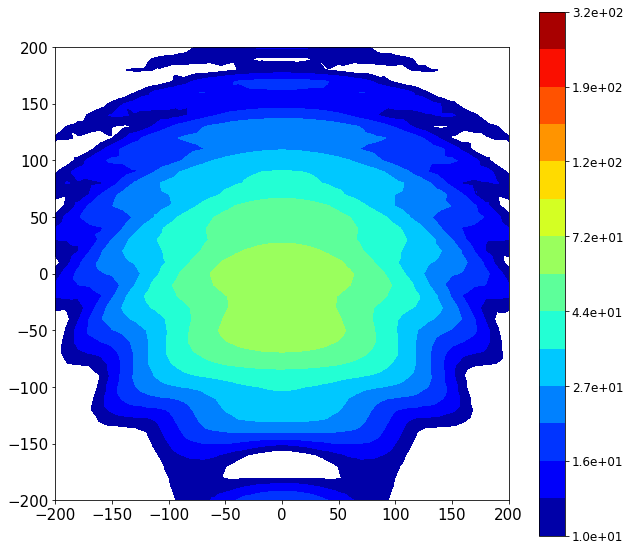

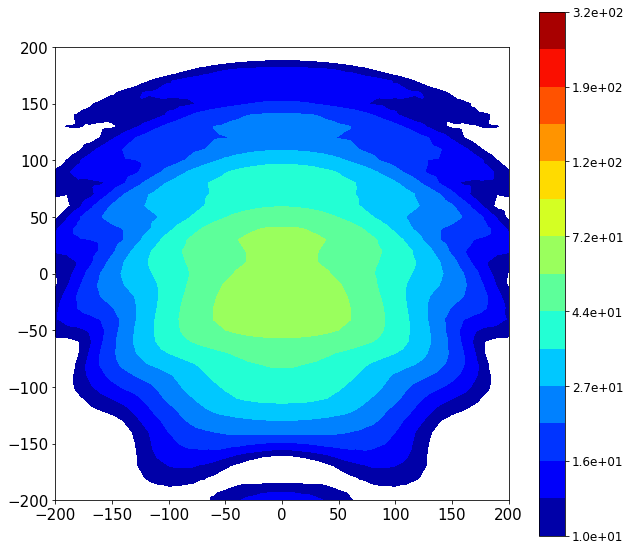

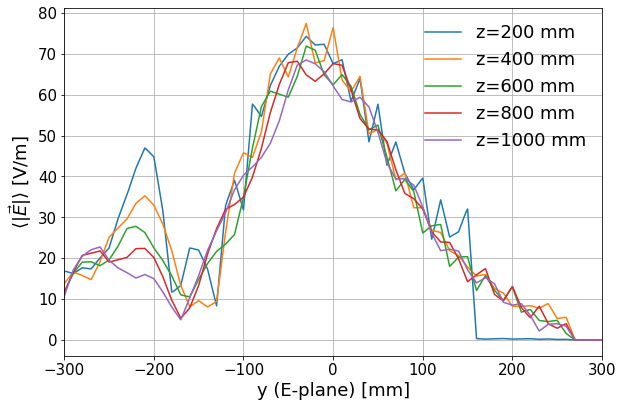

In [97]:
_slicedata_list2 = []
for i, _label in enumerate(_label_list):
    _newgrid = ( np.linspace(-500, 500, 500+1), np.linspace(-500, 500, 500+1) )
    fig, ax, _data = plot2D_key(_data_list[i], keys=['x', 'y', 'val0'], logz=True, 
                         levels=np.power(10., np.linspace(10, 25, 15)/10), 
                         newgrid=_newgrid)

    xlim = [-200, 200]
    ylim = [-200, 200]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    _data['val0'] = _data.pop('z') # key name change: z --> val0
    #print(_data)
    _slicedata_list2.append( slice_data(_data, 'x', 0.) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for _label, _data in zip(_label_list, _slicedata_list2):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-300, 300])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

Warning! There are several candidates for the x with y=0.5*ymax.
x candidates = [-228.76098307144716, -198.1352061211431, -108.27108206891283, 94.43091926894397]
Use two x closer to 0.
x_half = [94.43091926894397, -108.27108206891283]
fwhm 202.7020013378568
x @ y max = -27.0
Beam size @ power = 1/e = 115.84 mm / 121.73 mm
fwhm 194.48327699088856
x @ y max = -17.0
Beam size @ power = 1/e = 113.71 mm / 116.80 mm
fwhm 191.96416386166922
x @ y max = -23.0
Beam size @ power = 1/e = 113.74 mm / 115.29 mm
fwhm 204.41000567728136
x @ y max = -37.0
Beam size @ power = 1/e = 116.74 mm / 122.76 mm
fwhm 211.35014754813426
x @ y max = -25.0
Beam size @ power = 1/e = 124.63 mm / 126.93 mm


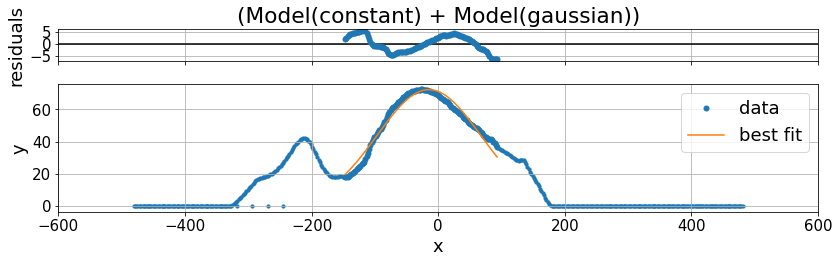

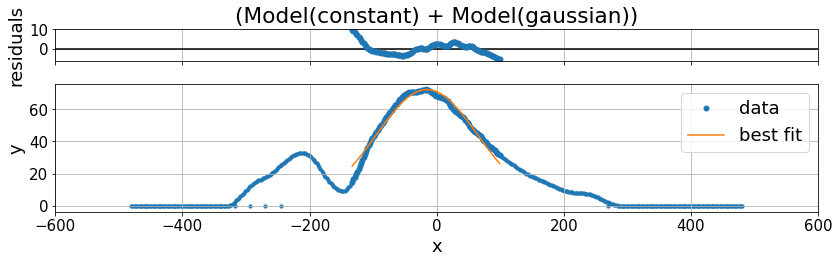

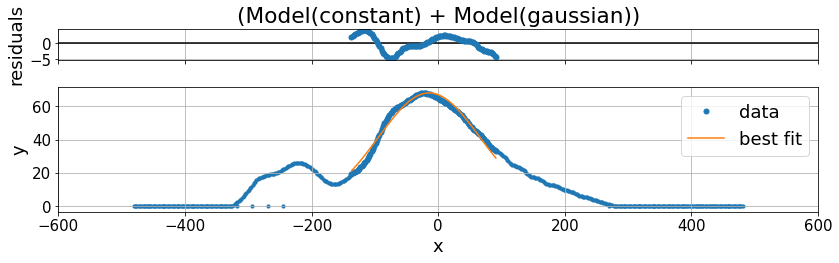

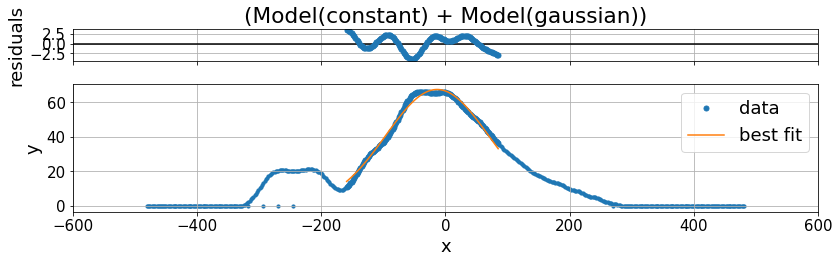

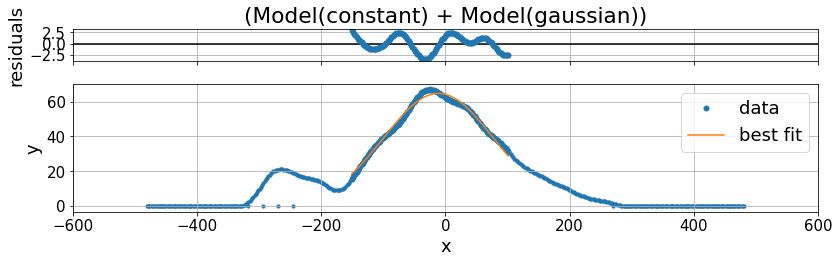

In [98]:
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 20
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list2) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x = np.convolve(_x, _b, mode="same") 
    _y = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x, _y) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*1.0, _x_ymax+_fwhm_from_half*1.0], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

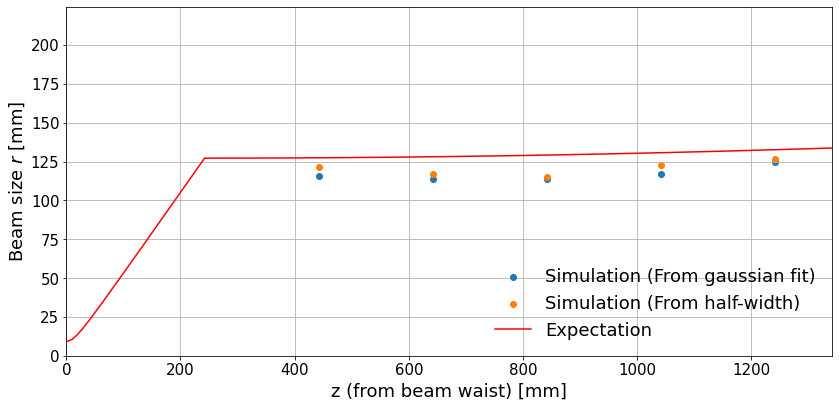

In [102]:
# Temporary Expectation
_z_tmp_list = z_antenna_list
_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list + z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
#ax.scatter(z_list20/mm, beamsize_list20/mm, label='Simulation v2-0 (From gaussian fit)')
ax.plot(z_list/mm, beamsize_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm)*1.1)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm)*1.1)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

data_list30 = _data_list
slicedata_list30 = _slicedata_list
z_list30 = _z_list
w_list30 = _w_list
beamsize_list30 = _beamsize_list
fitresult_list30 = _fitresult_list

## Circular Antenna v3-1
- r1 = 12.7
- L = 25.4
- a = 6.35
- b = 12.7
- L0 = 6.35
- L1 = 2.54

taper A = 20.556045219583464 deg
taper B = 14.036243467926479 deg
A = 12.7 mm
B = 12.7 mm
Ra = 18.084807927588773 mm
Rb = 26.181720722672143 mm
A/B = 1.0
w_A/A = 0.88
w_B/B = 0.64
beam waist in A = 6.352408840058716 mm
beam waist distance from aperture in A = -12.242048601327244 mm
beam waist distance from antenna bottom in A = 15.697951398672755 mm
beam waist in B = 7.1851115379811645 mm
beam waist distance from aperture in B = -5.722088405768236 mm
beam waist distance from antenna bottom in B = 22.217911594231765 mm
antenna taper angle in A = 20.556045219583464 deg
antenna taper angle in B = 14.036243467926479 deg
_w0 = 6.352408840058716 mm
_d_waist = 12.242048601327244 mm
_L_waist = 15.697951398672755 mm


(0.0, 500.0)

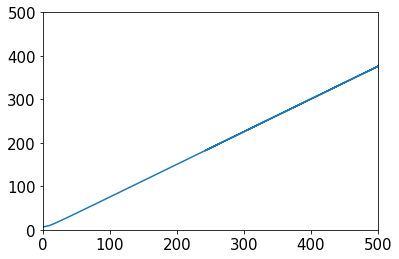

In [46]:
# Expectation
_r = 12.7*mm
_L = 25.4*mm
_L1 = 2.54*mm
_a = 6.35*mm
_b = 12.7*mm
_taperA = np.arctan( (_r - _a/2.)/_L )
_taperB = np.arctan( (_r - _b/2.)/_L )
print(f'taper A = {np.rad2deg(_taperA)} deg')
print(f'taper B = {np.rad2deg(_taperB)} deg')
_antenna_pars = calc_circular_antenna_parameters(
    antenna_R=_r,
    antenna_taperA = _taperA, 
    antenna_taperB = _taperB, 
    antenna_L=_L+_L1, 
    antenna_w_over_A = 0.88, # smooth-walled  circular E-plane
    antenna_w_over_B = 0.64, # smooth-walled circular H-plane
)

_w0 = _antenna_pars['w0A'] # beam waist
_d_waist = _antenna_pars['d0A'] # distance from waist to aperture
_L_waist = _antenna_pars['L0A'] # distance from antenna bottom to beam waist
print(f'_w0 = {_w0/mm} mm')
print(f'_d_waist = {_d_waist/mm} mm')
print(f'_L_waist = {_L_waist/mm} mm')

_z_antenna_list = z_list
_beamsize_antenna_list = calc_beamwaist(w0=_w0, z=z_list, wavelength=wavelength)
plt.plot(z_list/mm, _beamsize_antenna_list/mm)
plt.xlim([0, 500])
plt.ylim([0, 500])

In [47]:
_indir = 'input/CST/Circular_v3-1/E-field_abs_ave'
_w_list_mm = np.array([0, 20, 40, 60, 100, 150, 200, 250, 300, 400, 500])
_w_list= _w_list_mm * mm
_infile_list = [ f'w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

_data_list = []
_slicedata_list = []
for _infile in _infile_list:
    print(_infile)
    _data_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    #_slicedata_list.append( slice_file(_infile, _indir, 'x', 0.))
    _slicedata_list.append( slice_file(_infile, _indir, 'x', 2.5))
    pass

w0.dat
input file = input/CST/Circular_v3-1/E-field_abs_ave/w0.dat (type=3D_twovalue)
input file = input/CST/Circular_v3-1/E-field_abs_ave/w0.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w20.dat
input file = input/CST/Circular_v3-1/E-field_abs_ave/w20.dat (type=3D_twovalue)
input file = input/CST/Circular_v3-1/E-field_abs_ave/w20.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w40.dat
input file = input/CST/Circular_v3-1/E-field_abs_ave/w40.dat (type=3D_twovalue)
input file = input/CST/Circular_v3-1/E-field_abs_ave/w40.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w60.dat
input file = input/CST/Circular_v3-1/E-field_abs_ave/w60.dat (type=3D_twovalue)
input file = input/CST/Circular_v3-1/E-field_abs_ave/w60.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w100.dat
input file = input/CST/Circular_v3-1/E-field_abs_ave/w100.dat (type=3D_twovalue)
input file = input/CST/Circular_v3-1/E-field_abs_ave/w100.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w150.dat
input file = input/CST/Cir

x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 

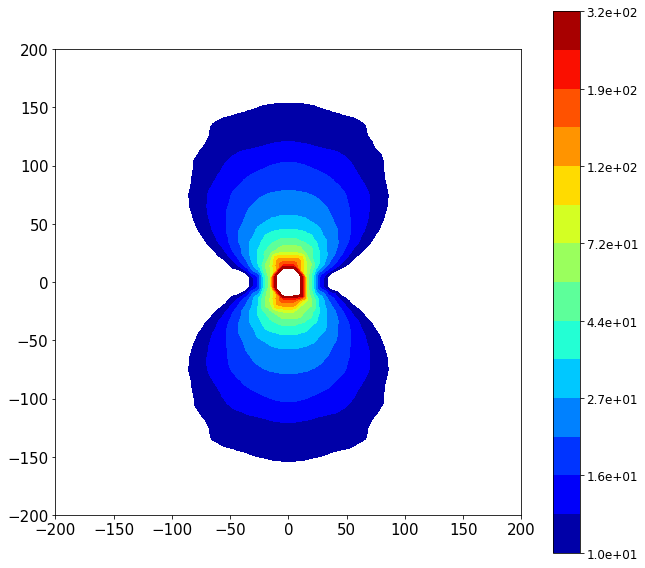

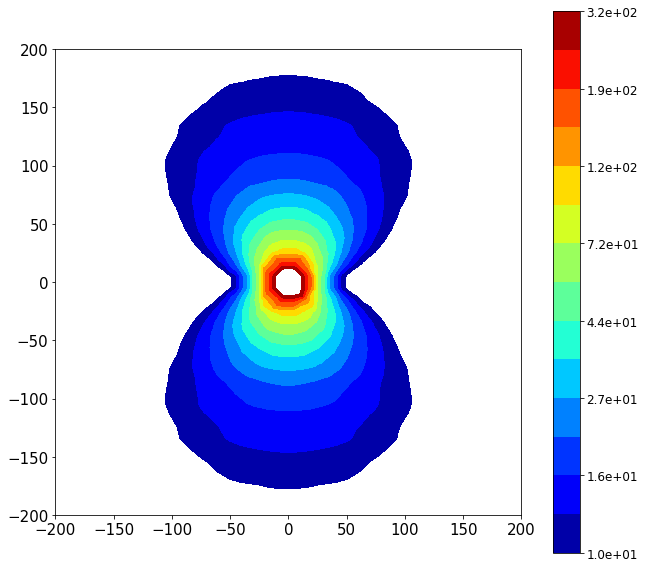

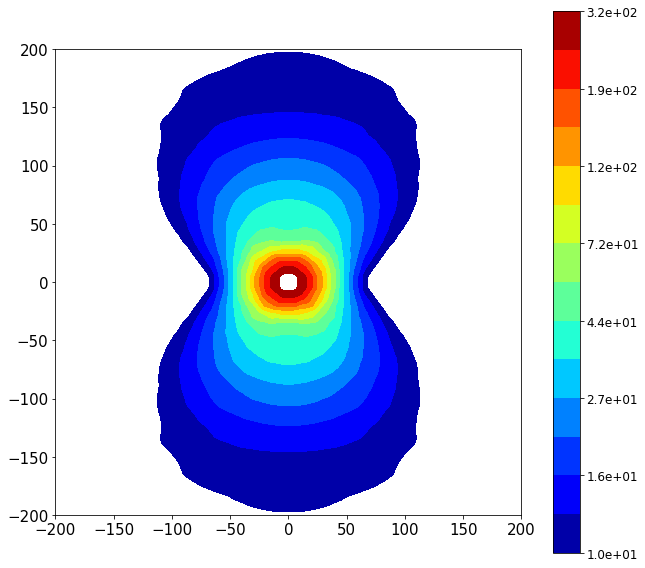

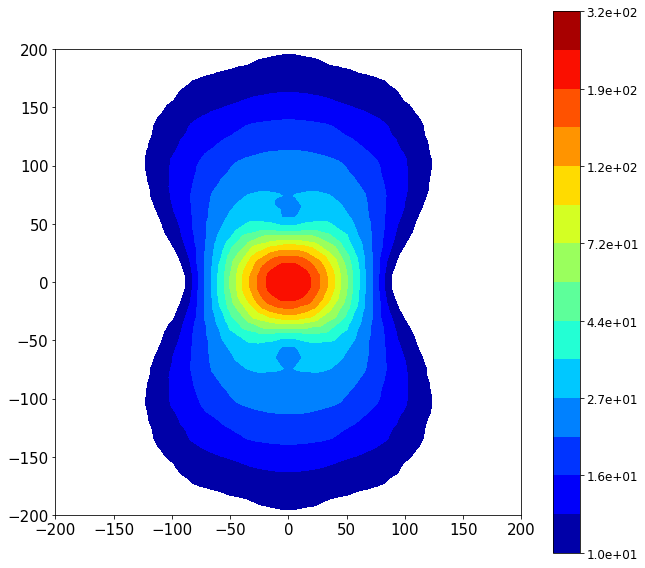

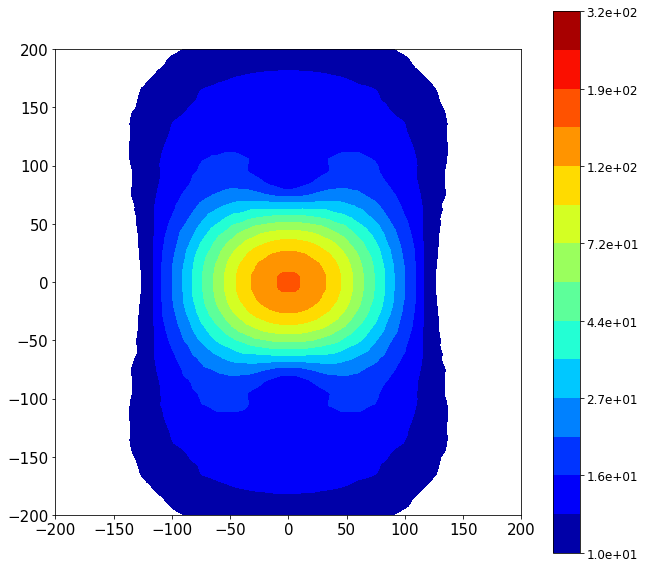

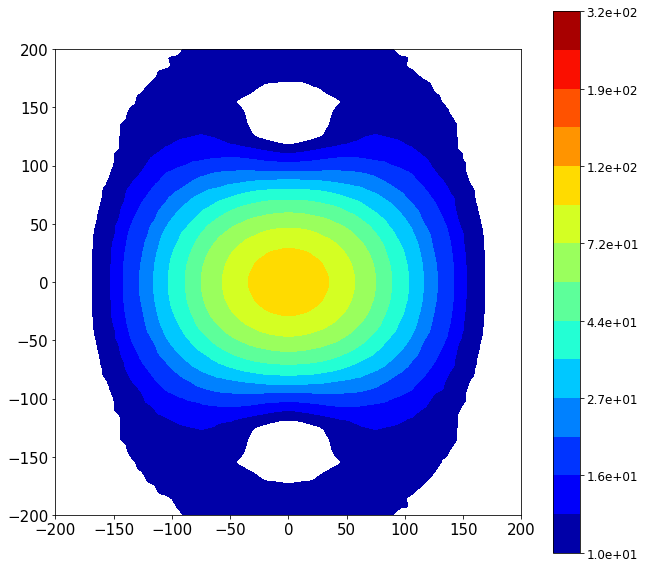

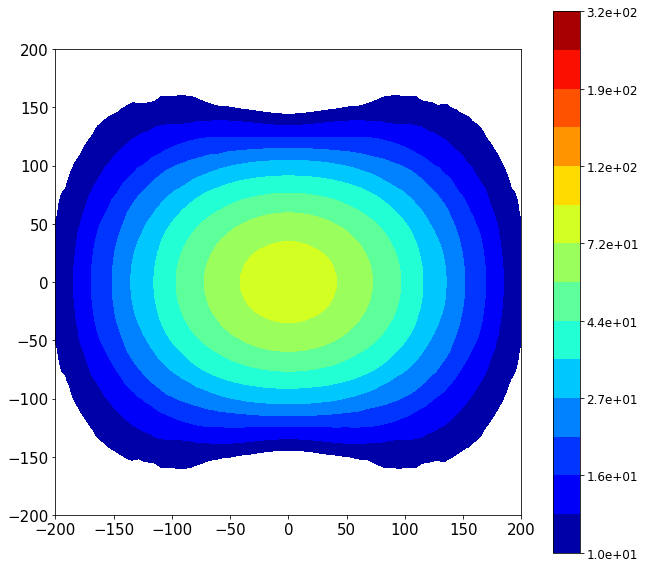

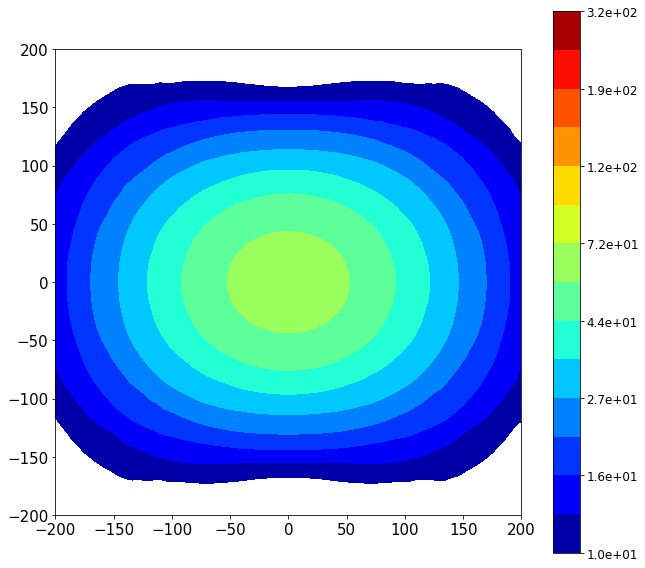

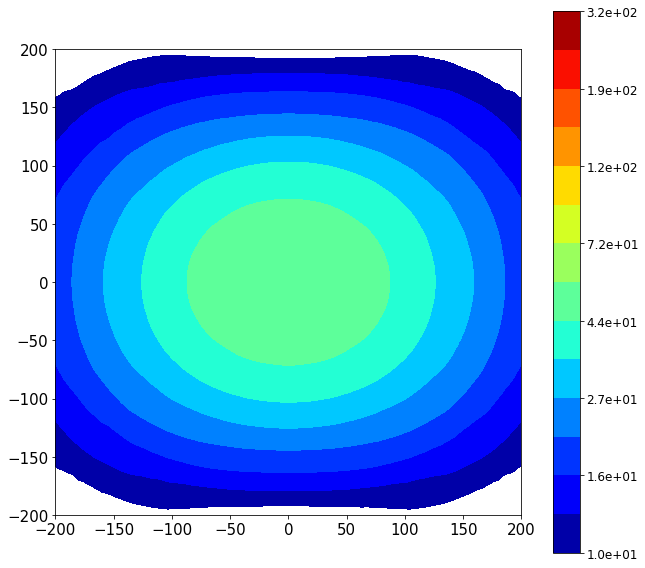

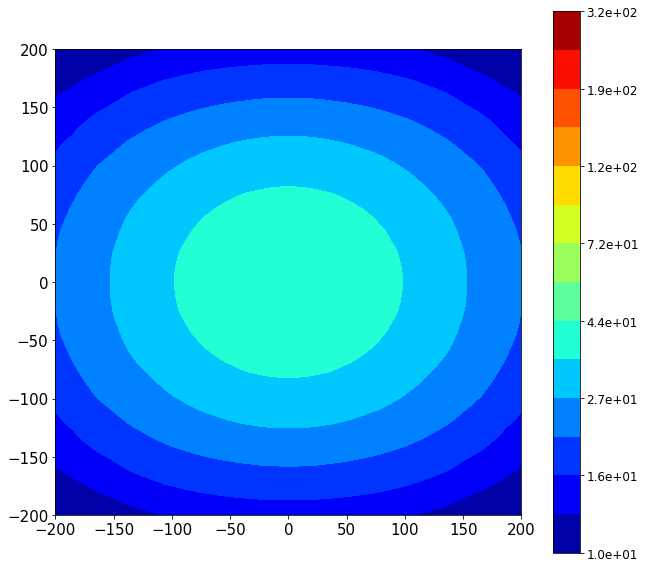

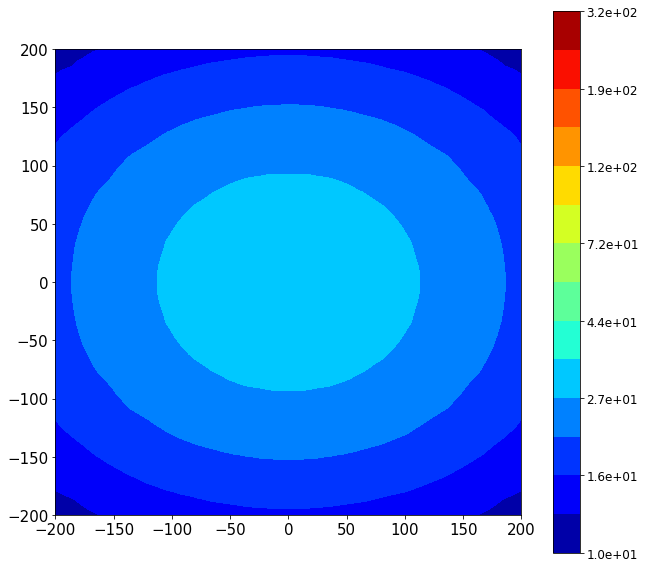

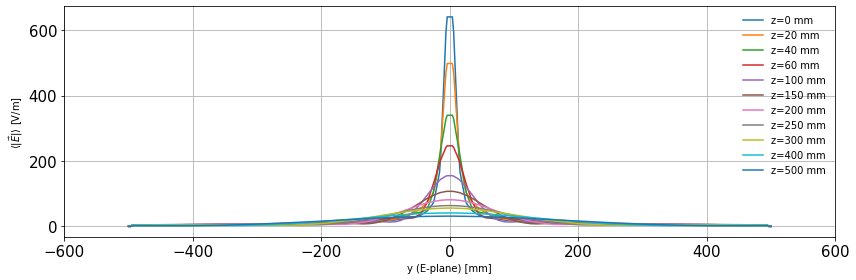

In [48]:
_slicedata_list2 = []
for i, _label in enumerate(_label_list):
    _newgrid = ( np.linspace(-500, 500, 500+1), np.linspace(-500, 500, 500+1) )
    fig, ax, _data = plot2D_key(_data_list[i], keys=['x', 'y', 'val0'], logz=True, 
                         levels=np.power(10., np.linspace(10, 25, 15)/10), 
                         newgrid=_newgrid)

    xlim = [-200, 200]
    ylim = [-200, 200]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    _data['val0'] = _data.pop('z') # key name change: z --> val0
    print(_data['val0'])
    _data['val0'][np.isnan(_data['val0'])] = 0.
    print(_data['val0'])
    _slicedata_list2.append( slice_data(_data, 'x', 0.) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(_label_list, _slicedata_list2):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

640.9300000000001
fwhm 23.768044337515036
x @ y max = -4.0
Beam size @ power = 1/e = 14.14 mm / 14.27 mm
498.28
fwhm 27.45288966725044
x @ y max = -4.0
Beam size @ power = 1/e = 16.95 mm / 16.49 mm
339.88
fwhm 39.447749937149084
x @ y max = -4.0
Beam size @ power = 1/e = 23.25 mm / 23.69 mm
246.32
fwhm 53.270693359708055
x @ y max = -4.0
Beam size @ power = 1/e = 31.79 mm / 31.99 mm
154.87
fwhm 84.51826718219837
x @ y max = -4.0
Beam size @ power = 1/e = 50.61 mm / 50.76 mm
107.07
fwhm 123.337980308443
x @ y max = -4.0
Beam size @ power = 1/e = 74.04 mm / 74.07 mm
81.23000000000002
fwhm 162.45277535600113
x @ y max = -4.0
Beam size @ power = 1/e = 97.74 mm / 97.56 mm
63.48700000000001
fwhm 204.1469517743403
x @ y max = -4.0
Beam size @ power = 1/e = 122.96 mm / 122.60 mm
55.84400000000001
fwhm 244.0349819059107
x @ y max = -4.0
Beam size @ power = 1/e = 146.90 mm / 146.56 mm
40.99900000000001
fwhm 322.06192358366263
x @ y max = -4.0
Beam size @ power = 1/e = 193.62 mm / 193.42 mm
31.21

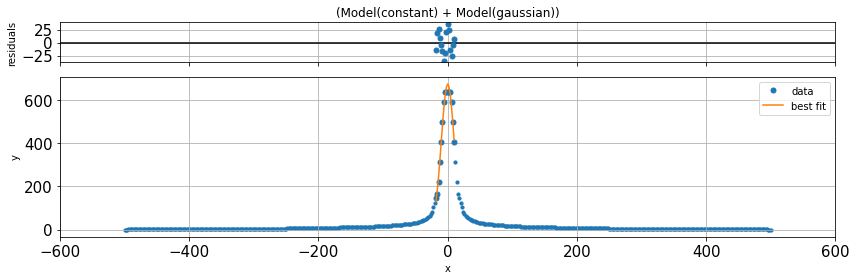

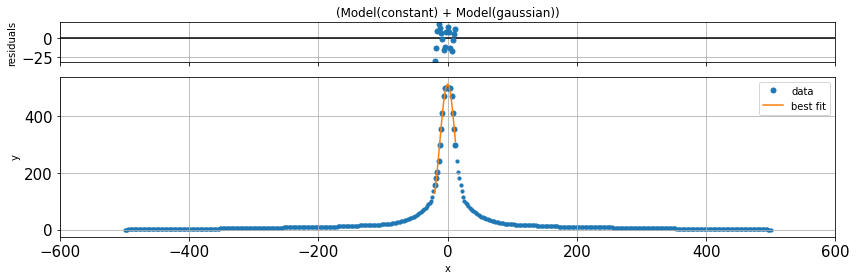

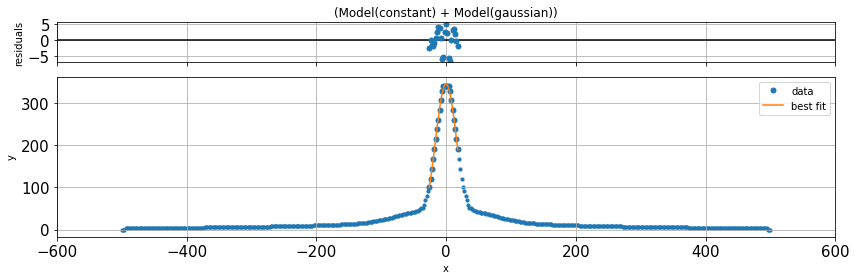

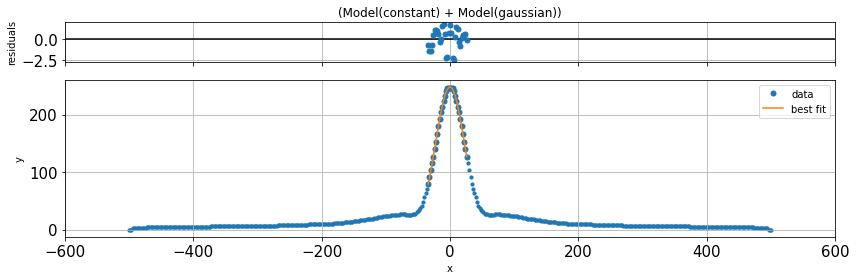

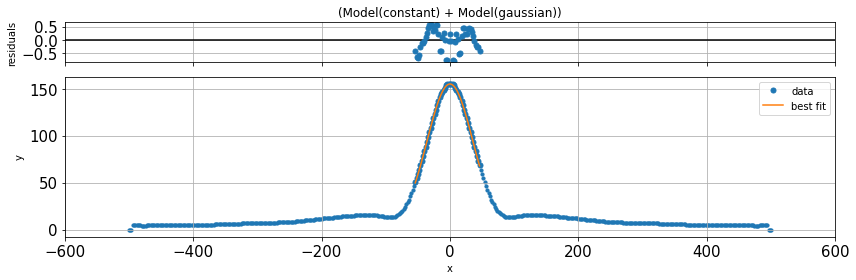

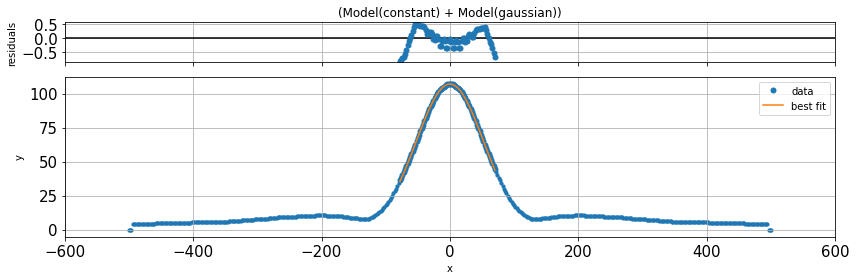

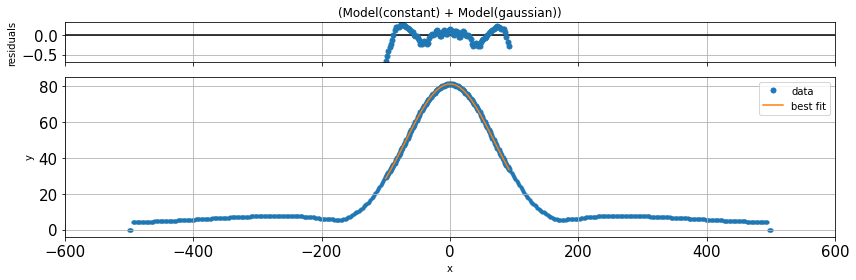

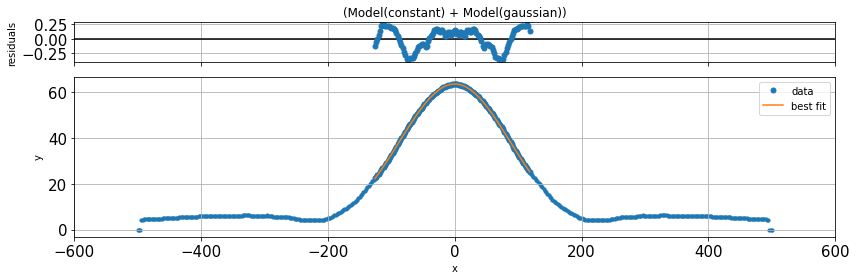

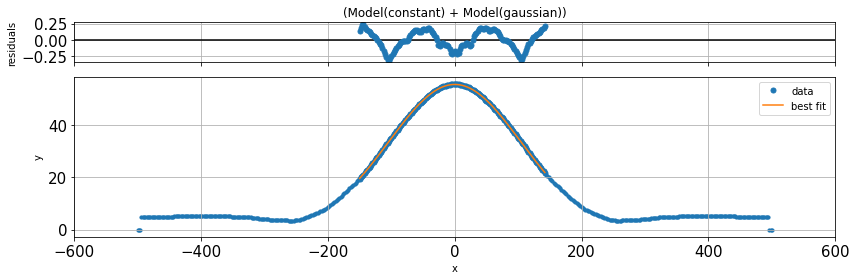

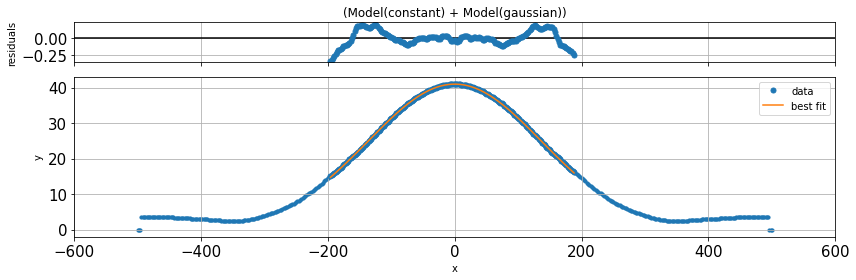

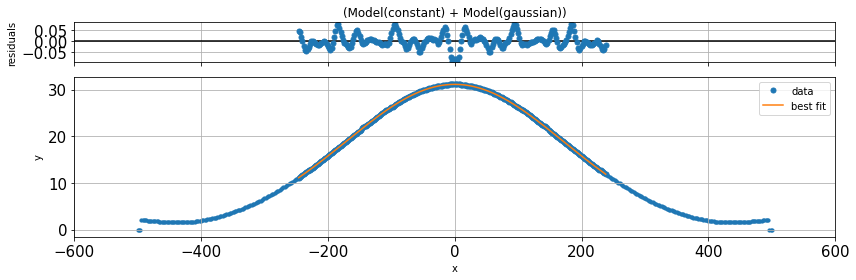

In [49]:
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 1
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list2) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x = np.convolve(_x, _b, mode="same") 
    _y = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    print(max(_y))
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x, _y) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*1.0, _x_ymax+_fwhm_from_half*1.0], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

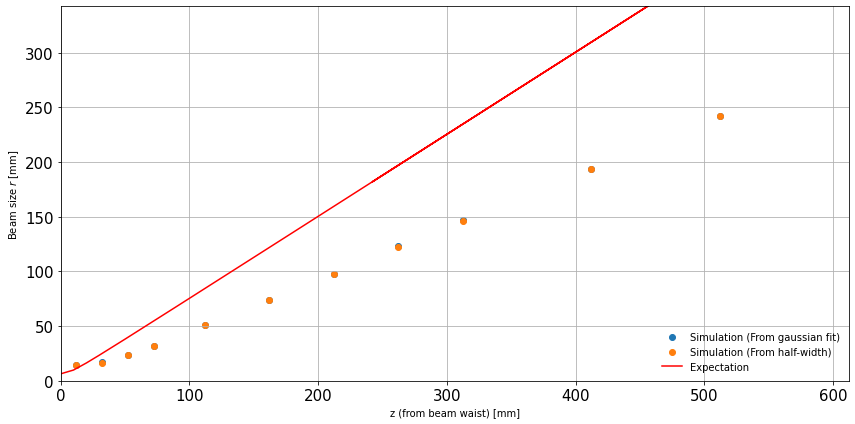

In [50]:
# Expectation tmp
_z_tmp_list = z_antenna_list
_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list + _d_waist

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(_z_antenna_list/mm, _beamsize_antenna_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm) + 100)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm) + 100)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

data_list31Antenna = _data_list
slicedata_list31Antenna = _slicedata_list
z_list31Antenna = _z_list
w_list31Antenna = _w_list
beamsize_list31Antenna = _beamsize_list
fitresult_list31Antenna = _fitresult_list

w0 = 9.970950401645744 +- 0.06704953791641793 mm
z0 = -7.318438993619669 +- 1.7779505254603392 mm
redchi = 2.3164891332950292e-06
success = True
w0 = 9.992010750664493 +- 0.06512157021041581 mm
z0 = -7.058418306684105 +- 1.7237354057784922 mm
redchi = 2.1711949708307892e-06
success = True


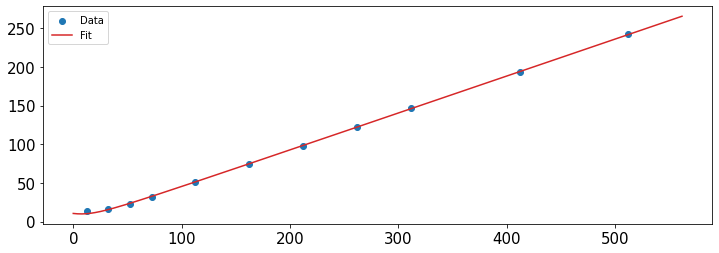

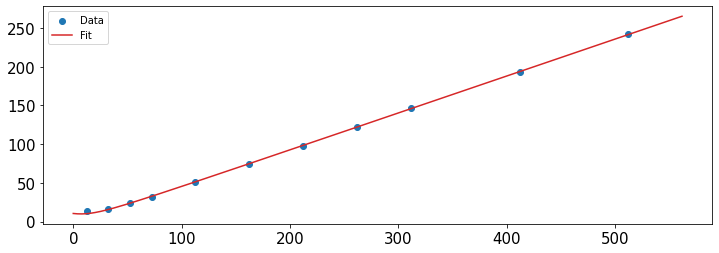

In [51]:
fit_beamsize(_z_list, _beamsize_list, w0)
fit_beamsize(_z_list, _beamsize2_list, w0)

## Circular Antenna v4-1

taper A = 7.125016348901798 deg
taper B = 7.125016348901798 deg
A = 12.7 mm
B = 12.7 mm
Ra = 51.195336701695794 mm
Rb = 51.195336701695794 mm
A/B = 1.0
w_A/A = 0.88
w_B/B = 0.64
beam waist in A = 9.950613896586916 mm
beam waist distance from aperture in A = -10.61110137419911 mm
beam waist distance from antenna bottom in A = 40.18889862580088 mm
beam waist in B = 7.8461070766010685 mm
beam waist distance from aperture in B = -3.4895046269021575 mm
beam waist distance from antenna bottom in B = 47.31049537309784 mm
antenna taper angle in A = 7.125016348901797 deg
antenna taper angle in B = 7.125016348901797 deg
_w0 = 9.950613896586916 mm
_d_waist = 10.61110137419911 mm
_L_waist = 40.18889862580088 mm


(0.0, 500.0)

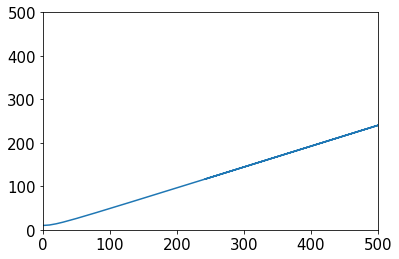

In [52]:
# Expectation
_r0 = 12.7*0.5*mm
_r1 = 12.7*1*mm
_L = 25.4*2*mm
_a = _r0*2
_b = _r0*2
_taperA = np.arctan( (_r1 - _a/2.)/_L )
_taperB = np.arctan( (_r1 - _b/2.)/_L )
print(f'taper A = {np.rad2deg(_taperA)} deg')
print(f'taper B = {np.rad2deg(_taperB)} deg')
_antenna_pars = calc_circular_antenna_parameters(
    antenna_R=_r1,
    antenna_taperA = _taperA, 
    antenna_taperB = _taperB, 
    antenna_L=_L, 
    antenna_w_over_A = 0.88, # smooth-walled  circular E-plane
    antenna_w_over_B = 0.64, # smooth-walled circular H-plane
)

_w0 = _antenna_pars['w0A'] # beam waist
_d_waist = _antenna_pars['d0A'] # distance from waist to aperture
_L_waist = _antenna_pars['L0A'] # distance from antenna bottom to beam waist
print(f'_w0 = {_w0/mm} mm')
print(f'_d_waist = {_d_waist/mm} mm')
print(f'_L_waist = {_L_waist/mm} mm')

_z_antenna_list = z_list
_beamsize_antenna_list = calc_beamwaist(w0=_w0, z=z_list, wavelength=wavelength)
plt.plot(z_list/mm, _beamsize_antenna_list/mm)
plt.xlim([0, 500])
plt.ylim([0, 500])

In [53]:
_indir = 'input/CST/Circular_v4-1/E-field_abs_ave'
_w_list_mm = np.array([0, 20, 40, 60, 100, 150, 200, 250, 300, 400, 500])
_w_list= _w_list_mm * mm
_infile_list = [ f'w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

_data_list = []
_slicedata_list = []
for _infile in _infile_list:
    print(_infile)
    _data_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    #_slicedata_list.append( slice_file(_infile, _indir, 'x', 0.))
    _slicedata_list.append( slice_file(_infile, _indir, 'x', 2.5))
    pass

w0.dat
input file = input/CST/Circular_v4-1/E-field_abs_ave/w0.dat (type=3D_twovalue)
input file = input/CST/Circular_v4-1/E-field_abs_ave/w0.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w20.dat
input file = input/CST/Circular_v4-1/E-field_abs_ave/w20.dat (type=3D_twovalue)
input file = input/CST/Circular_v4-1/E-field_abs_ave/w20.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w40.dat
input file = input/CST/Circular_v4-1/E-field_abs_ave/w40.dat (type=3D_twovalue)
input file = input/CST/Circular_v4-1/E-field_abs_ave/w40.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w60.dat
input file = input/CST/Circular_v4-1/E-field_abs_ave/w60.dat (type=3D_twovalue)
input file = input/CST/Circular_v4-1/E-field_abs_ave/w60.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w100.dat
input file = input/CST/Circular_v4-1/E-field_abs_ave/w100.dat (type=3D_twovalue)
input file = input/CST/Circular_v4-1/E-field_abs_ave/w100.dat (type=3D_twovalue)
getSlice min_diff = 2.51
w150.dat
input file = input/CST/Cir

x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
getSlice min_diff = 0.01
x_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
[nan nan nan ... nan nan nan]
[0. 

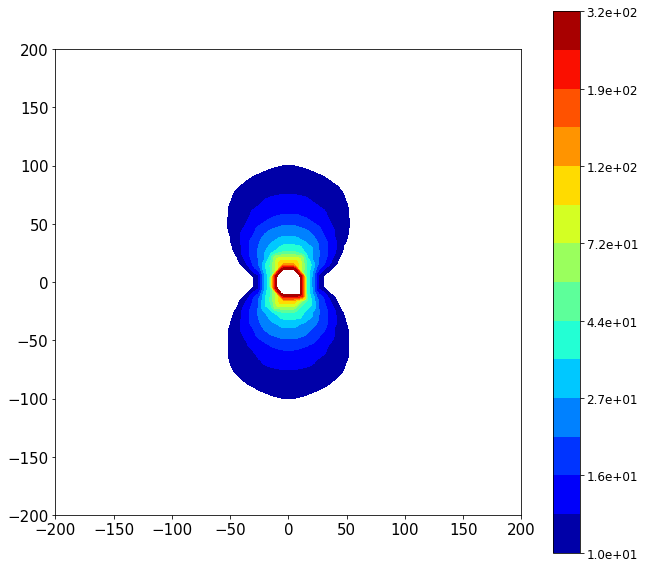

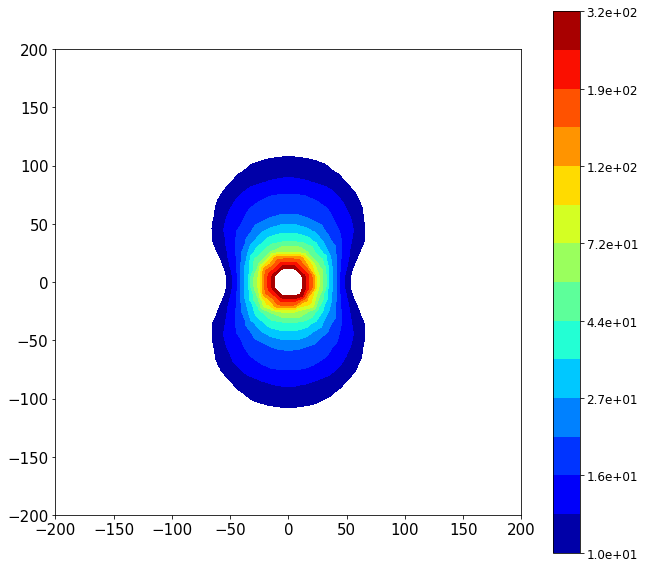

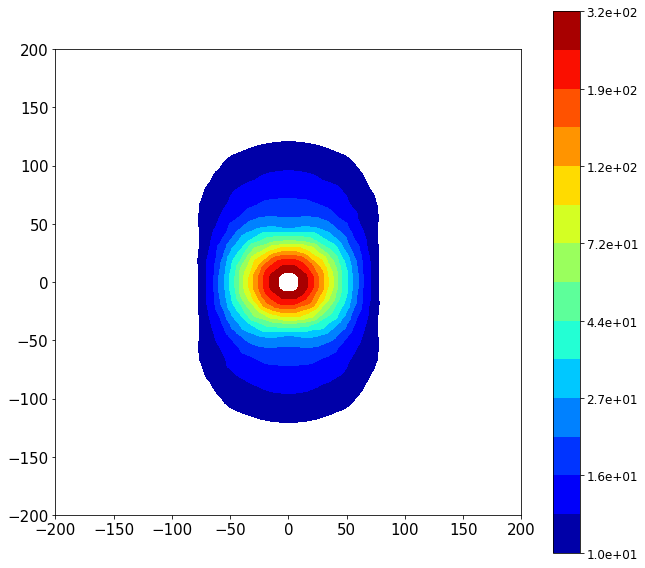

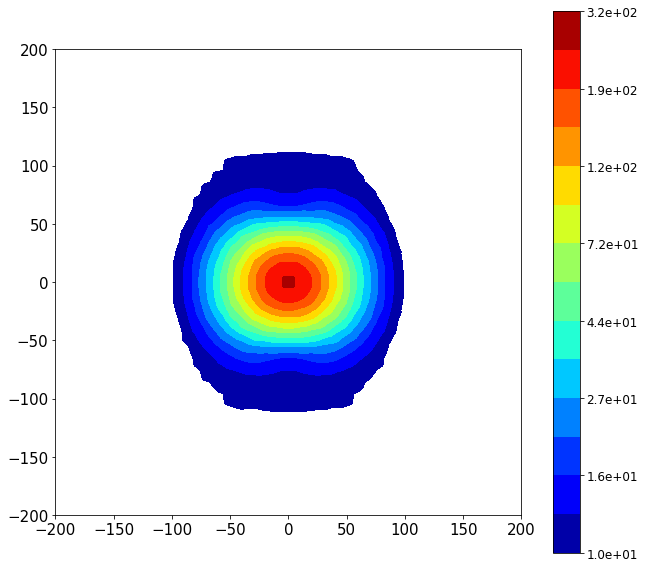

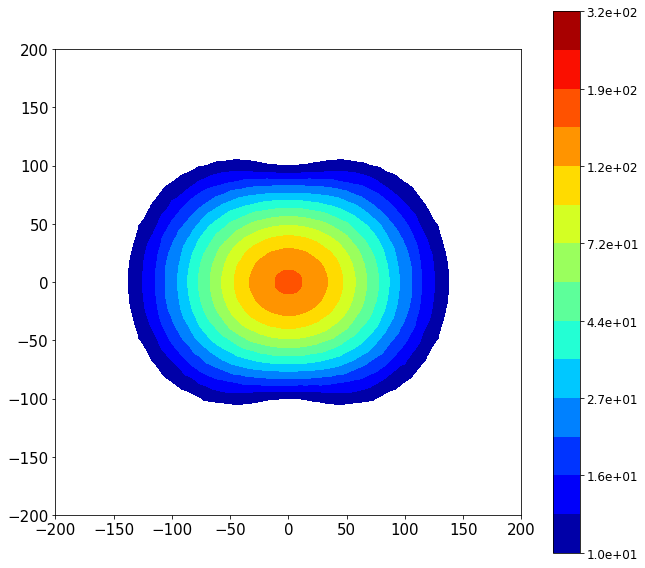

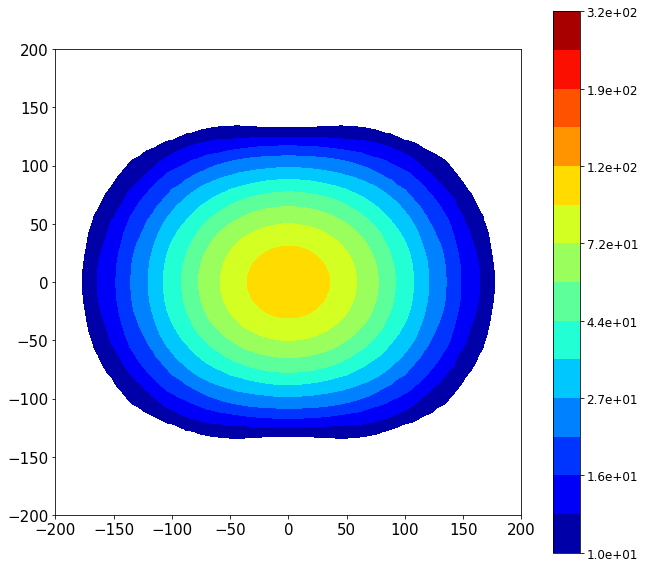

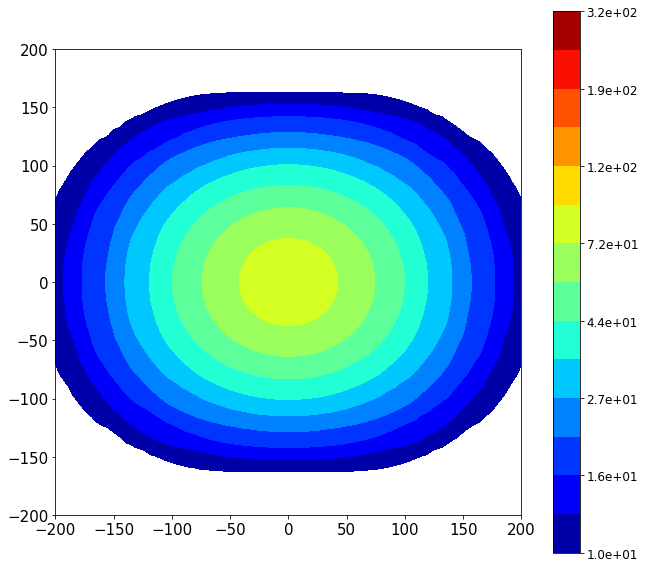

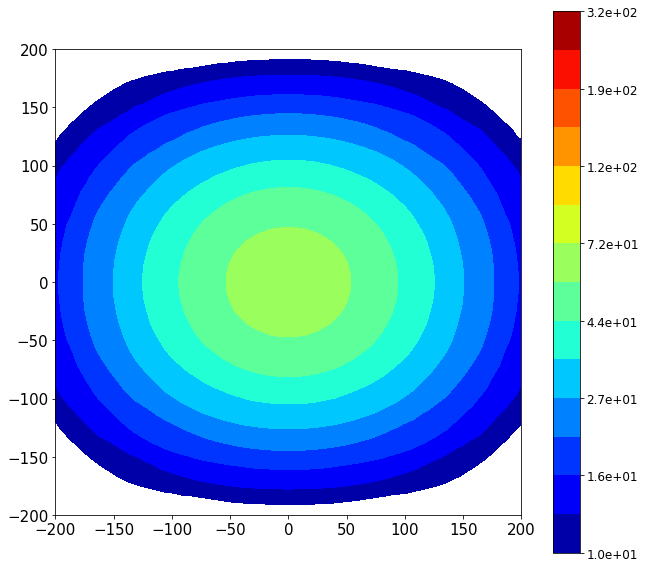

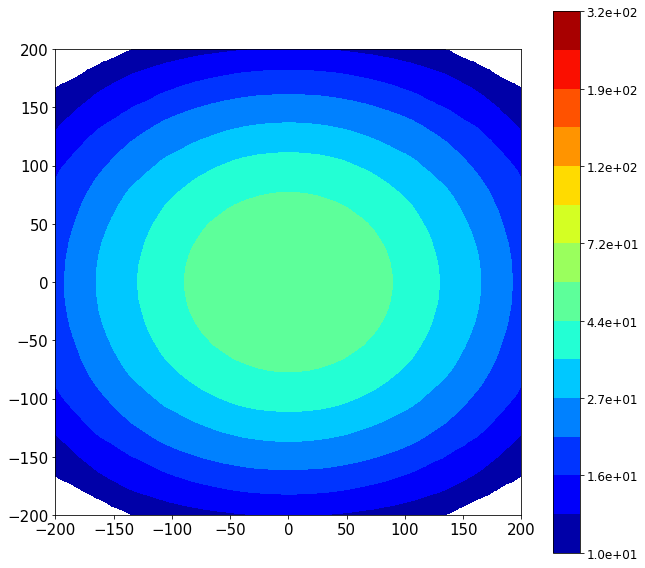

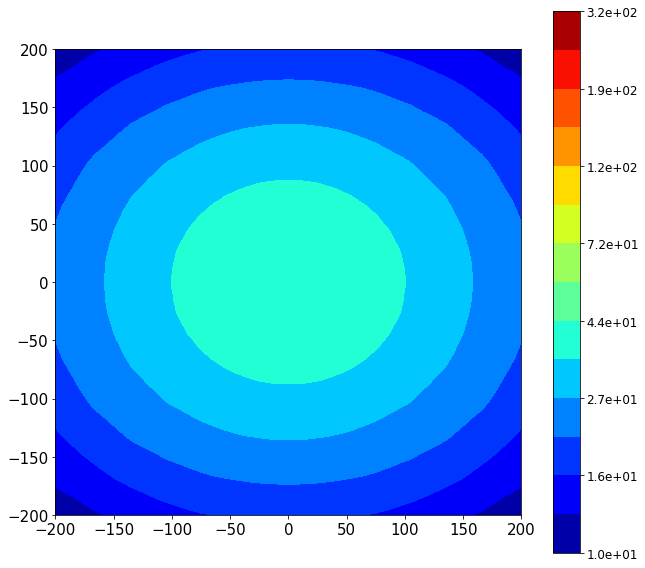

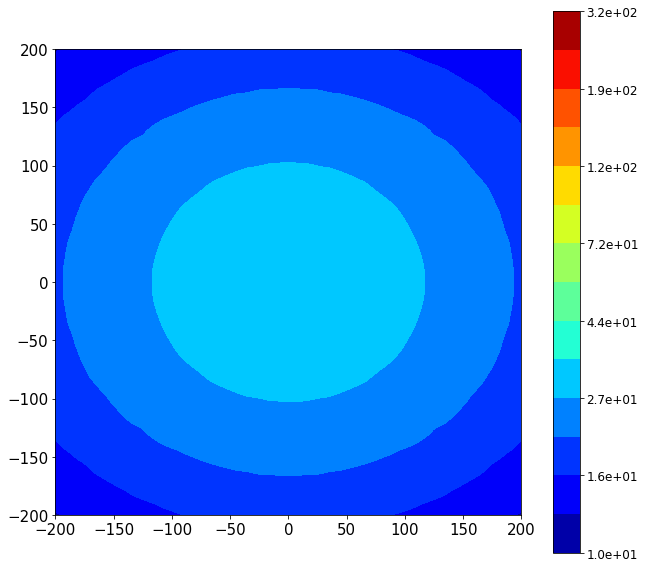

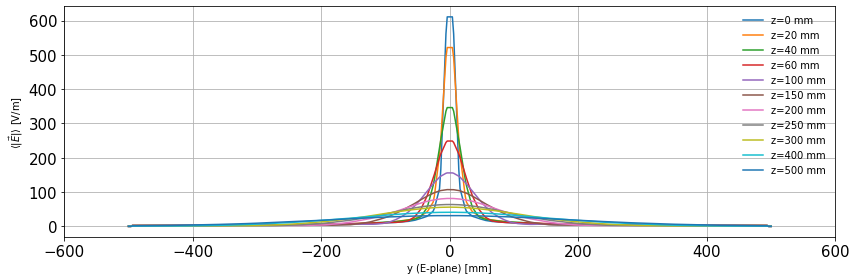

In [54]:
_slicedata_list2 = []
for i, _label in enumerate(_label_list):
    _newgrid = ( np.linspace(-500, 500, 500+1), np.linspace(-500, 500, 500+1) )
    fig, ax, _data = plot2D_key(_data_list[i], keys=['x', 'y', 'val0'], logz=True, 
                         levels=np.power(10., np.linspace(10, 25, 15)/10), 
                         newgrid=_newgrid)

    xlim = [-200, 200]
    ylim = [-200, 200]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    _data['val0'] = _data.pop('z') # key name change: z --> val0
    print(_data['val0'])
    _data['val0'][np.isnan(_data['val0'])] = 0.
    print(_data['val0'])
    _slicedata_list2.append( slice_data(_data, 'x', 0.) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(_label_list, _slicedata_list2):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

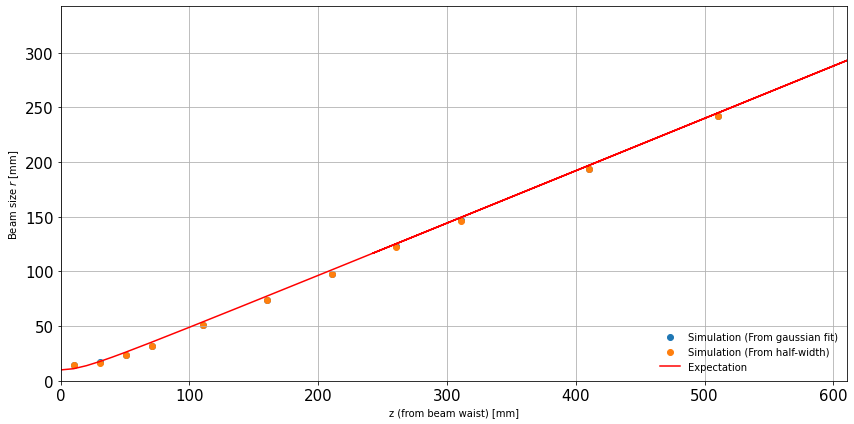

In [55]:
# Expectation tmp
_z_tmp_list = z_antenna_list
_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list + _d_waist

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(_z_antenna_list/mm, _beamsize_antenna_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm) + 100)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm) + 100)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

data_list31Antenna = _data_list
slicedata_list31Antenna = _slicedata_list
z_list31Antenna = _z_list
w_list31Antenna = _w_list
beamsize_list31Antenna = _beamsize_list
fitresult_list31Antenna = _fitresult_list

w0 = 9.97095019875589 +- 0.06704952882850003 mm
z0 = -5.687498526973325 +- 1.777950867454446 mm
redchi = 2.3164891332593022e-06
success = True
w0 = 9.99201055255191 +- 0.06512159664762551 mm
z0 = -5.42747765822088 +- 1.7237360643640633 mm
redchi = 2.1711949707998577e-06
success = True


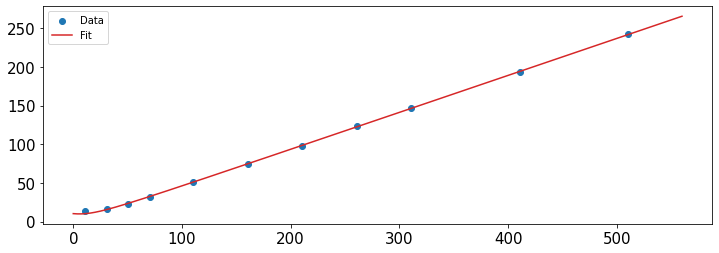

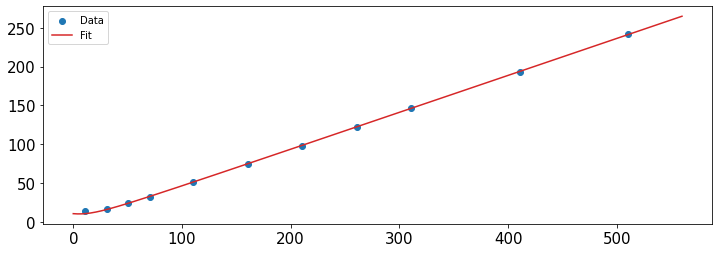

In [56]:
fit_beamsize(_z_list, _beamsize_list, w0)
fit_beamsize(_z_list, _beamsize2_list, w0)

# The End